In [183]:
!pip install seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.spatial.distance import cdist

In [167]:
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Suppress ConvergenceWarnings
warnings.simplefilter(action='ignore', category=ConvergenceWarning)


In [119]:
df = pd.read_csv('compressed data.csv')  # Replace 'dataset.csv' with the actual filename and path


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 80 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     2000 non-null   int64  
 1   id                             2000 non-null   object 
 2   apiURLs                        0 non-null      float64
 3   address                        2000 non-null   object 
 4   brokers                        1717 non-null   object 
 5   buildingName                   28 non-null     object 
 6   city                           2000 non-null   object 
 7   congressionalDistrictHouse     473 non-null    float64
 8   country                        2000 non-null   object 
 9   county                         527 non-null    object 
 10  countyFIPS                     527 non-null    float64
 11  currentOwnerType               527 non-null    object 
 12  dateAdded                      2000 non-null   o

In [121]:
df.head()

,Unnamed: 0,id,apiURLs,address,brokers,buildingName,city,congressionalDistrictHouse,country,county,...,province,reviews,rules,subdivision,statuses,taxID,yearBuilt,taxID.1,transactions,yearBuilt.1
0,0,AW7uEX3S0x_BgD4egue-,NaN,1632 N 37th Ave,"[{""agent"":""Juan Cruz"",""company"":""EMG Real Esta...",NaN,Phoenix,16.0,US,Maricopa,...,AZ,NaN,NaN,Palomar Homes,"[{""date"":""2022-01-24T00:00:00.000Z"",""dateSeen""...",NaN,NaN,NaN,"[{""saleDate"":""2022-01-24T00:00:00.000Z"",""price...",1948.0
1,1,AW7uEX3S0x_BgD4egue-,NaN,1632 N 37th Ave,"[{""agent"":""Juan Cruz"",""company"":""EMG Real Esta...",NaN,Phoenix,16.0,US,Maricopa,...,AZ,NaN,NaN,Palomar Homes,"[{""date"":""2022-01-24T00:00:00.000Z"",""dateSeen""...",NaN,NaN,NaN,"[{""saleDate"":""2022-01-24T00:00:00.000Z"",""price...",1948.0
2,2,AW7uEX3S0x_BgD4egue-,NaN,1632 N 37th Ave,"[{""agent"":""Juan Cruz"",""company"":""EMG Real Esta...",NaN,Phoenix,16.0,US,Maricopa,...,AZ,NaN,NaN,Palomar Homes,"[{""date"":""2022-01-24T00:00:00.000Z"",""dateSeen""...",NaN,NaN,NaN,"[{""saleDate"":""2022-01-24T00:00:00.000Z"",""price...",1948.0
3,3,AW7uEX3S0x_BgD4egue-,NaN,1632 N 37th Ave,"[{""agent"":""Juan Cruz"",""company"":""EMG Real Esta...",NaN,Phoenix,16.0,US,Maricopa,...,AZ,NaN,NaN,Palomar Homes,"[{""date"":""2022-01-24T00:00:00.000Z"",""dateSeen""...",NaN,NaN,NaN,"[{""saleDate"":""2022-01-24T00:00:00.000Z"",""price...",1948.0
4,4,AW7uEX3S0x_BgD4egue-,NaN,1632 N 37th Ave,"[{""agent"":""Juan Cruz"",""company"":""EMG Real Esta...",NaN,Phoenix,16.0,US,Maricopa,...,AZ,NaN,NaN,Palomar Homes,"[{""date"":""2022-01-24T00:00:00.000Z"",""dateSeen""...",NaN,NaN,NaN,"[{""saleDate"":""2022-01-24T00:00:00.000Z"",""price...",1948.0


In [122]:
df.describe()

,Unnamed: 0,apiURLs,congressionalDistrictHouse,countyFIPS,deposits,floorSizeValue,instrumentNumber,languagesSpoken,latitude,leasingTerms,...,prices.amountMin,prices.dateValidStart,prices.dateValidEnd,prices.minStay,prices.pricePerSquareFoot,reviews,rules,taxID,yearBuilt,yearBuilt.1
count,2000.000000,0.0,473.000000,527.0,0.0,1952.000000,5.020000e+02,0.0,2000.000000,0.0,...,1.999000e+03,0.0,0.0,0.0,1.831000e+03,0.0,0.0,0.0,0.0,1974.000000
mean,999.500000,NaN,15.465116,4013.0,NaN,2143.338660,2.022275e+10,NaN,33.578785,NaN,...,1.100553e+117,NaN,NaN,NaN,5.992804e+76,NaN,NaN,NaN,NaN,1981.389564
std,577.494589,NaN,0.669674,0.0,NaN,1519.466503,4.077390e+06,NaN,0.569312,NaN,...,4.920590e+118,NaN,NaN,NaN,2.564332e+78,NaN,NaN,NaN,NaN,25.088868
min,0.000000,NaN,14.000000,4013.0,NaN,167.232000,2.022003e+10,NaN,33.294049,NaN,...,8.500000e+02,NaN,NaN,NaN,1.040000e+00,NaN,NaN,NaN,NaN,1852.000000
25%,499.750000,NaN,15.000000,4013.0,NaN,1326.000000,2.022043e+10,NaN,33.485220,NaN,...,2.225000e+05,NaN,NaN,NaN,1.710000e+02,NaN,NaN,NaN,NaN,1960.000000
50%,999.500000,NaN,15.000000,4013.0,NaN,1780.000000,2.022069e+10,NaN,33.515207,NaN,...,3.800000e+05,NaN,NaN,NaN,2.264500e+02,NaN,NaN,NaN,NaN,1982.000000
75%,1499.250000,NaN,16.000000,4013.0,NaN,2477.000000,2.022092e+10,NaN,33.610540,NaN,...,6.149000e+05,NaN,NaN,NaN,2.990000e+02,NaN,NaN,NaN,NaN,2004.000000
max,1999.000000,NaN,17.000000,4013.0,NaN,10900.000000,2.023034e+10,NaN,42.267247,NaN,...,2.200005e+120,NaN,NaN,NaN,1.097282e+80,NaN,NaN,NaN,NaN,2023.000000


In [123]:
df.duplicated().sum()

0

In [124]:
df = df.drop_duplicates()

In [125]:
df.isnull().sum()

Unnamed: 0         0
id                 0
apiURLs         2000
address            0
brokers          283
                ... 
taxID           2000
yearBuilt       2000
taxID.1         1599
transactions    1481
yearBuilt.1       26
Length: 80, dtype: int64

In [126]:
null_counts = df.isnull().sum()
sorted_columns = null_counts.sort_values()
print(sorted_columns)

Unnamed: 0                  0
statuses                    0
province                    0
postalCode                  0
mlsNumber                   0
                         ... 
prices.dateValidStart    2000
leasingTerms             2000
paymentTypes             2000
reviews                  2000
prices.dateValidEnd      2000
Length: 80, dtype: int64


In [127]:
def drop_columns_with_high_null(df, threshold=0.75):
    null_percentages = df.isnull().mean()
    columns_to_drop = null_percentages[null_percentages > threshold].index
    df = df.drop(columns=columns_to_drop)
    return df

In [128]:
df=drop_columns_with_high_null(df, threshold=0.75)

In [129]:
df.isnull().sum().sort_values()

Unnamed: 0                          0
longitude                           0
mostRecentStatusDate                0
mostRecentStatusFirstDateSeen       0
mlsNumber                           0
latitude                            0
postalCode                          0
geoLocation                         0
dateUpdated                         0
features                            0
province                            0
country                             0
city                                0
statuses                            0
address                             0
id                                  0
dateAdded                           0
prices.dateSeen                     1
descriptions                        1
prices.currency                     1
prices.amountMin                    1
prices.amountMax                    1
propertyType                        1
mostRecentPriceDate                 2
mostRecentPriceFirstDateSeen        2
mostRecentPriceDomain               2
mostRecentPr

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 58 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     2000 non-null   int64  
 1   id                             2000 non-null   object 
 2   address                        2000 non-null   object 
 3   brokers                        1717 non-null   object 
 4   city                           2000 non-null   object 
 5   country                        2000 non-null   object 
 6   county                         527 non-null    object 
 7   countyFIPS                     527 non-null    float64
 8   currentOwnerType               527 non-null    object 
 9   dateAdded                      2000 non-null   object 
 10  dateUpdated                    2000 non-null   object 
 11  descriptions                   1999 non-null   object 
 12  features                       2000 non-null   o

In [131]:
df.drop("id",axis=1,inplace=True)
df.head()

,Unnamed: 0,address,brokers,city,country,county,countyFIPS,currentOwnerType,dateAdded,dateUpdated,...,prices.isSale,prices.isSold,prices.pricePerSquareFoot,propertyTaxes,propertyType,province,subdivision,statuses,transactions,yearBuilt.1
0,0,1632 N 37th Ave,"[{""agent"":""Juan Cruz"",""company"":""EMG Real Esta...",Phoenix,US,Maricopa,4013.0,INDIVIDUAL,2019-12-10T04:29:14Z,2023-07-12T18:23:16Z,...,False,True,145.00,"[{""amount"":544.0,""currency"":""USD"",""dateSeen"":[...",Single Family Dwelling,AZ,Palomar Homes,"[{""date"":""2022-01-24T00:00:00.000Z"",""dateSeen""...","[{""saleDate"":""2022-01-24T00:00:00.000Z"",""price...",1948.0
1,1,1632 N 37th Ave,"[{""agent"":""Juan Cruz"",""company"":""EMG Real Esta...",Phoenix,US,Maricopa,4013.0,INDIVIDUAL,2019-12-10T04:29:14Z,2023-07-12T18:23:16Z,...,False,True,156.00,"[{""amount"":544.0,""currency"":""USD"",""dateSeen"":[...",Single Family Dwelling,AZ,Palomar Homes,"[{""date"":""2022-01-24T00:00:00.000Z"",""dateSeen""...","[{""saleDate"":""2022-01-24T00:00:00.000Z"",""price...",1948.0
2,2,1632 N 37th Ave,"[{""agent"":""Juan Cruz"",""company"":""EMG Real Esta...",Phoenix,US,Maricopa,4013.0,INDIVIDUAL,2019-12-10T04:29:14Z,2023-07-12T18:23:16Z,...,False,NaN,287.37,"[{""amount"":544.0,""currency"":""USD"",""dateSeen"":[...",Single Family Dwelling,AZ,Palomar Homes,"[{""date"":""2022-01-24T00:00:00.000Z"",""dateSeen""...","[{""saleDate"":""2022-01-24T00:00:00.000Z"",""price...",1948.0
3,3,1632 N 37th Ave,"[{""agent"":""Juan Cruz"",""company"":""EMG Real Esta...",Phoenix,US,Maricopa,4013.0,INDIVIDUAL,2019-12-10T04:29:14Z,2023-07-12T18:23:16Z,...,False,NaN,286.60,"[{""amount"":544.0,""currency"":""USD"",""dateSeen"":[...",Single Family Dwelling,AZ,Palomar Homes,"[{""date"":""2022-01-24T00:00:00.000Z"",""dateSeen""...","[{""saleDate"":""2022-01-24T00:00:00.000Z"",""price...",1948.0
4,4,1632 N 37th Ave,"[{""agent"":""Juan Cruz"",""company"":""EMG Real Esta...",Phoenix,US,Maricopa,4013.0,INDIVIDUAL,2019-12-10T04:29:14Z,2023-07-12T18:23:16Z,...,False,False,300.15,"[{""amount"":544.0,""currency"":""USD"",""dateSeen"":[...",Single Family Dwelling,AZ,Palomar Homes,"[{""date"":""2022-01-24T00:00:00.000Z"",""dateSeen""...","[{""saleDate"":""2022-01-24T00:00:00.000Z"",""price...",1948.0


In [132]:
df.drop("city",axis=1,inplace=True)
df.drop("country",axis=1,inplace=True)
df.drop("county",axis=1,inplace=True)
df.drop("countyFIPS",axis=1,inplace=True)

### Dropping these columns because all have the same values

In [133]:
def segregate_columns(df):
    categorical_cols = df.select_dtypes(include='object').columns
    numerical_cols = df.select_dtypes(include=['int', 'float']).columns
    return categorical_cols, numerical_cols

In [134]:
categorical_cols, numerical_cols=segregate_columns(df)

In [135]:
df[numerical_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 2000 non-null   int64  
 1   floorSizeValue             1952 non-null   float64
 2   instrumentNumber           502 non-null    float64
 3   latitude                   2000 non-null   float64
 4   longitude                  2000 non-null   float64
 5   lotSizeValue               1976 non-null   float64
 6   mostRecentPriceAmount      1998 non-null   float64
 7   numBathroom                1984 non-null   float64
 8   numBedroom                 1986 non-null   float64
 9   numFloor                   1946 non-null   float64
 10  numRoom                    1256 non-null   float64
 11  postalCode                 2000 non-null   int64  
 12  prices.amountMax           1999 non-null   float64
 13  prices.amountMin           1999 non-null   float

In [136]:
for i in numerical_cols:
    df[i].fillna(df[i].mean(), inplace=True)
df[numerical_cols].isnull().sum()

Unnamed: 0                   0
floorSizeValue               0
instrumentNumber             0
latitude                     0
longitude                    0
lotSizeValue                 0
mostRecentPriceAmount        0
numBathroom                  0
numBedroom                   0
numFloor                     0
numRoom                      0
postalCode                   0
prices.amountMax             0
prices.amountMin             0
prices.pricePerSquareFoot    0
yearBuilt.1                  0
dtype: int64

In [137]:
df[numerical_cols].head()

,Unnamed: 0,floorSizeValue,instrumentNumber,latitude,longitude,lotSizeValue,mostRecentPriceAmount,numBathroom,numBedroom,numFloor,numRoom,postalCode,prices.amountMax,prices.amountMin,prices.pricePerSquareFoot,yearBuilt.1
0,0,1291.0,2.022007e+10,33.46769,-112.13903,5628.0,387500.0,2.0,3.0,1.0,6.0,85009,79800.0,79800.0,145.00,1948.0
1,1,1291.0,2.022007e+10,33.46769,-112.13903,5628.0,387500.0,2.0,3.0,1.0,6.0,85009,79800.0,79800.0,156.00,1948.0
2,2,1291.0,2.022007e+10,33.46769,-112.13903,5628.0,387500.0,2.0,3.0,1.0,6.0,85009,371000.0,371000.0,287.37,1948.0
3,3,1291.0,2.022007e+10,33.46769,-112.13903,5628.0,387500.0,2.0,3.0,1.0,6.0,85009,370000.0,370000.0,286.60,1948.0
4,4,1291.0,2.022007e+10,33.46769,-112.13903,5628.0,387500.0,2.0,3.0,1.0,6.0,85009,387500.0,387500.0,300.15,1948.0


In [138]:
for i in numerical_cols:
    print(df[i].describe())

count    2000.000000
mean      999.500000
std       577.494589
min         0.000000
25%       499.750000
50%       999.500000
75%      1499.250000
max      1999.000000
Name: Unnamed: 0, dtype: float64
count     2000.000000
mean      2143.338660
std       1501.112938
min        167.232000
25%       1358.000000
50%       1809.000000
75%       2422.750000
max      10900.000000
Name: floorSizeValue, dtype: float64
count    2.000000e+03
mean     2.022275e+10
std      2.041243e+06
min      2.022003e+10
25%      2.022275e+10
50%      2.022275e+10
75%      2.022275e+10
max      2.023034e+10
Name: instrumentNumber, dtype: float64
count    2000.000000
mean       33.578785
std         0.569312
min        33.294049
25%        33.485220
50%        33.515207
75%        33.610540
max        42.267247
Name: latitude, dtype: float64
count    2000.000000
mean     -111.998315
std         1.933463
min      -122.818246
25%      -112.112000
50%      -112.057660
75%      -112.021850
max       -76.574344
Name

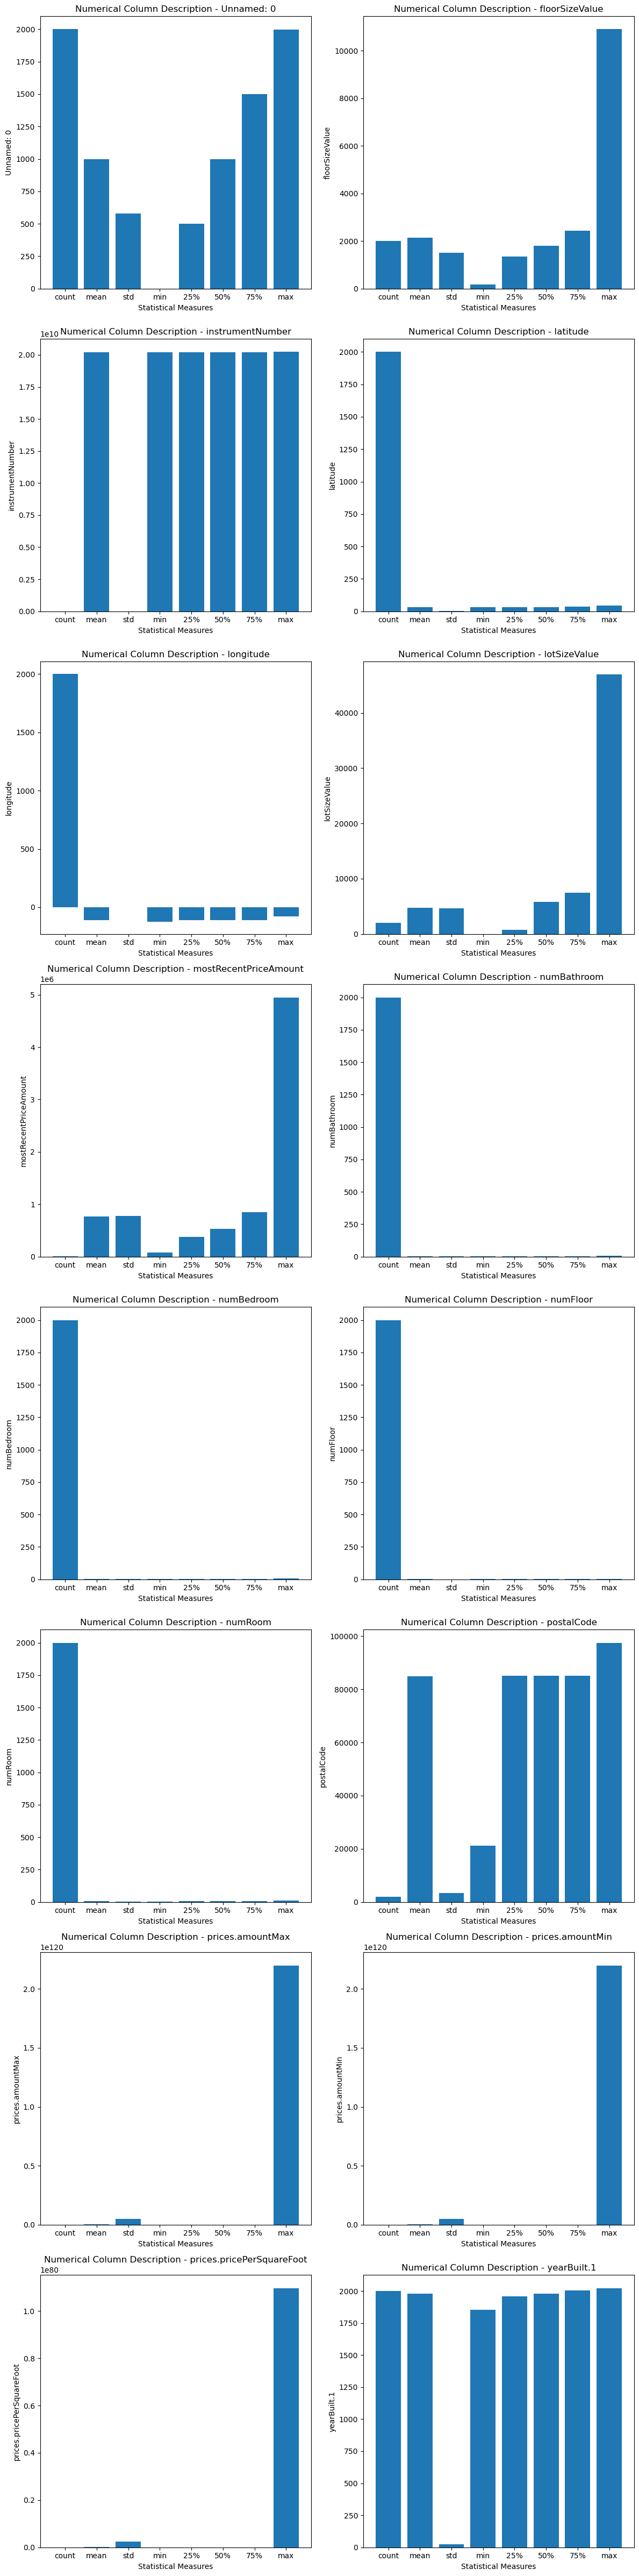

In [139]:
def visualize_numerical_description1(df):
    numerical_columns = df.select_dtypes(include=['number'])
    num_cols = numerical_columns.columns
    num_cols_count = len(num_cols)
    nrows = int(num_cols_count / 2) + (num_cols_count % 2 > 0)
    ncols = 2

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 6 * nrows))
    fig.subplots_adjust(hspace=0.5)

    for i, column_name in enumerate(num_cols):
        row = i // ncols
        col = i % ncols

        column_description = numerical_columns[column_name].describe()

        axes[row, col].bar(column_description.index, column_description.values)
        axes[row, col].set_xlabel('Statistical Measures')
        axes[row, col].set_ylabel(column_name)
        axes[row, col].set_title('Numerical Column Description - {}'.format(column_name))

    plt.tight_layout()
    plt.show()
visualize_numerical_description1(df)

In [140]:
#plt.figure(figsize=(12,8))
#df1=df[numerical_cols].sample(frac=0.001,random_state=123)
#sns.pairplot(df1)

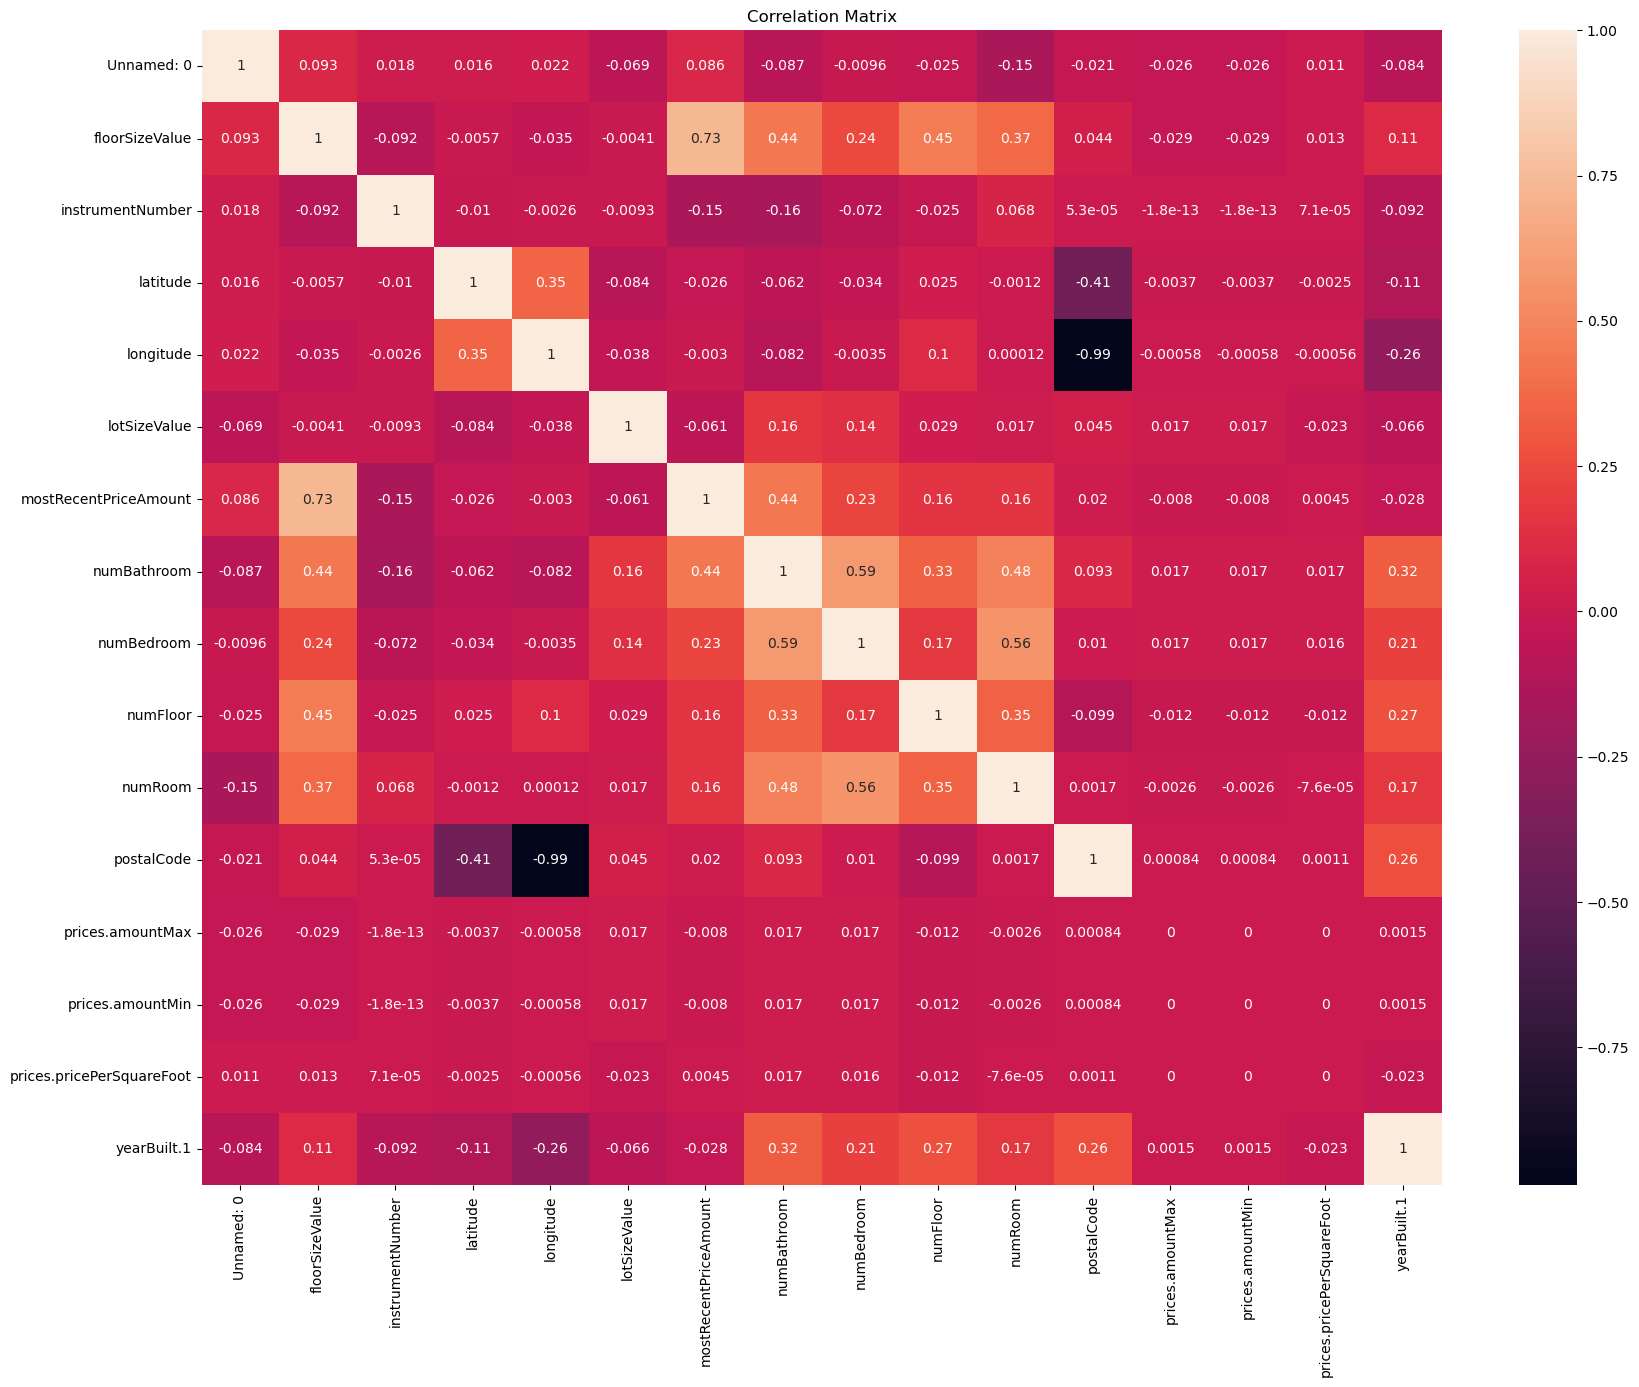

In [141]:
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

### We see that all the numerical columns are important

In [142]:
df[categorical_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   address                        2000 non-null   object
 1   brokers                        1717 non-null   object
 2   currentOwnerType               527 non-null    object
 3   dateAdded                      2000 non-null   object
 4   dateUpdated                    2000 non-null   object
 5   descriptions                   1999 non-null   object
 6   features                       2000 non-null   object
 7   fees                           1676 non-null   object
 8   floorSizeUnit                  1952 non-null   object
 9   geoLocation                    2000 non-null   object
 10  legalDescription               527 non-null    object
 11  legalRange                     527 non-null    object
 12  listingName                    769 non-null    object
 13  lot

In [143]:
for i in categorical_cols:
    df[i].fillna(df[i].mode()[0], inplace=True)
df[categorical_cols].isnull().sum()

address                          0
brokers                          0
currentOwnerType                 0
dateAdded                        0
dateUpdated                      0
descriptions                     0
features                         0
fees                             0
floorSizeUnit                    0
geoLocation                      0
legalDescription                 0
legalRange                       0
listingName                      0
lotSizeUnit                      0
managedBy                        0
mostRecentPriceDomain            0
mostRecentPriceSourceURL         0
mostRecentPriceDate              0
mostRecentPriceFirstDateSeen     0
mostRecentStatus                 0
mostRecentStatusDate             0
mostRecentStatusFirstDateSeen    0
mlsNumber                        0
neighborhoods                    0
parking                          0
phones                           0
prices.availability              0
prices.currency                  0
prices.dateSeen     

In [144]:
constant_cols = []
for column in categorical_cols:
    unique_values = df[column].nunique()
    if unique_values == 1:
        constant_cols.append(column)

print("Columns with constant values:", constant_cols)

Columns with constant values: ['mostRecentPriceDomain', 'prices.currency', 'prices.isSale']


In [145]:
df[['mostRecentPriceDomain', 'prices.currency', 'prices.isSale']].describe()

,mostRecentPriceDomain,prices.currency,prices.isSale
count,2000,2000,2000
unique,1,1,1
top,www.redfin.com,USD,False
freq,2000,2000,2000


### These three columns have constant and single values, hence can be removed

In [146]:
columns_to_drop = ['mostRecentPriceDomain', 'prices.currency', 'prices.isSale']  # List of column names to drop

df.drop(columns=columns_to_drop, inplace=True)

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 50 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     2000 non-null   int64  
 1   address                        2000 non-null   object 
 2   brokers                        2000 non-null   object 
 3   currentOwnerType               2000 non-null   object 
 4   dateAdded                      2000 non-null   object 
 5   dateUpdated                    2000 non-null   object 
 6   descriptions                   2000 non-null   object 
 7   features                       2000 non-null   object 
 8   fees                           2000 non-null   object 
 9   floorSizeValue                 2000 non-null   float64
 10  floorSizeUnit                  2000 non-null   object 
 11  geoLocation                    2000 non-null   object 
 12  instrumentNumber               2000 non-null   f

In [148]:
import pandas as pd
import json

# Function to extract JSON data and create new columns
def extract_json_data(df, column):
    # Convert column values to string
    df[column] = df[column].astype(str)
    
    # Extract JSON data
    json_data = df[column].apply(json.loads)
    
    # Normalize JSON data into separate columns
    json_df = pd.json_normalize(json_data)
    
    # Merge new columns with the original DataFrame
    df = pd.concat([df, json_df], axis=1)
    
    # Drop the original JSON column
    df.drop(columns=column, inplace=True)
    
    return df

# List of columns with JSON data
json_columns = ['brokers', 'descriptions', 'features', 'fees', 'managedBy', 'mlsNumber', 'people',
                'propertyTaxes', 'statuses', 'transactions']

# Iterate over the JSON columns
#for column in json_columns:
    #df = extract_json_data(df, column)
    
# Print the modified dataframe
print(df.head())


   Unnamed: 0          address  \
0           0  1632 N 37th Ave   
1           1  1632 N 37th Ave   
2           2  1632 N 37th Ave   
3           3  1632 N 37th Ave   
4           4  1632 N 37th Ave   

                                             brokers currentOwnerType  \
0  [{"agent":"Juan Cruz","company":"EMG Real Esta...       INDIVIDUAL   
1  [{"agent":"Juan Cruz","company":"EMG Real Esta...       INDIVIDUAL   
2  [{"agent":"Juan Cruz","company":"EMG Real Esta...       INDIVIDUAL   
3  [{"agent":"Juan Cruz","company":"EMG Real Esta...       INDIVIDUAL   
4  [{"agent":"Juan Cruz","company":"EMG Real Esta...       INDIVIDUAL   

              dateAdded           dateUpdated  \
0  2019-12-10T04:29:14Z  2023-07-12T18:23:16Z   
1  2019-12-10T04:29:14Z  2023-07-12T18:23:16Z   
2  2019-12-10T04:29:14Z  2023-07-12T18:23:16Z   
3  2019-12-10T04:29:14Z  2023-07-12T18:23:16Z   
4  2019-12-10T04:29:14Z  2023-07-12T18:23:16Z   

                                        descriptions  \
0  [{

In [149]:
!pip install scikit-learn


In [150]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [151]:
df1=df.copy()
categorical,numerical=segregate_columns(df)
df[categorical].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   address                        2000 non-null   object
 1   brokers                        2000 non-null   object
 2   currentOwnerType               2000 non-null   object
 3   dateAdded                      2000 non-null   object
 4   dateUpdated                    2000 non-null   object
 5   descriptions                   2000 non-null   object
 6   features                       2000 non-null   object
 7   fees                           2000 non-null   object
 8   floorSizeUnit                  2000 non-null   object
 9   geoLocation                    2000 non-null   object
 10  legalDescription               2000 non-null   object
 11  legalRange                     2000 non-null   object
 12  listingName                    2000 non-null   object
 13  lot

In [152]:
for col in categorical:
    label_encoder = LabelEncoder()
    df[col] = label_encoder.fit_transform(df[col])
df.drop("Unnamed: 0",axis=1,inplace=True)

In [153]:
df.head()

,address,brokers,currentOwnerType,dateAdded,dateUpdated,descriptions,features,fees,floorSizeValue,floorSizeUnit,...,prices.dateSeen,prices.isSold,prices.pricePerSquareFoot,propertyTaxes,propertyType,province,subdivision,statuses,transactions,yearBuilt.1
0,39,74,1,89,196,202,101,34,1291.0,2,...,241,True,145.00,159,4,0,26,31,1,1948.0
1,39,74,1,89,196,202,101,34,1291.0,2,...,465,True,156.00,159,4,0,26,31,1,1948.0
2,39,74,1,89,196,202,101,34,1291.0,2,...,1089,False,287.37,159,4,0,26,31,1,1948.0
3,39,74,1,89,196,202,101,34,1291.0,2,...,1052,False,286.60,159,4,0,26,31,1,1948.0
4,39,74,1,89,196,202,101,34,1291.0,2,...,1424,False,300.15,159,4,0,26,31,1,1948.0


In [181]:
df1

,Unnamed: 0,address,brokers,currentOwnerType,dateAdded,dateUpdated,descriptions,features,fees,floorSizeValue,...,prices.dateSeen,prices.isSold,prices.pricePerSquareFoot,propertyTaxes,propertyType,province,subdivision,statuses,transactions,yearBuilt.1
0,0,1632 N 37th Ave,"[{""agent"":""Juan Cruz"",""company"":""EMG Real Esta...",INDIVIDUAL,2019-12-10T04:29:14Z,2023-07-12T18:23:16Z,"[{""dateSeen"":""2023-07-12T18:23:00.000Z"",""value...","[{""key"":""Special Listing Cond"",""value"":[""N/A""]...","[{""amountMax"":0.0,""amountMin"":0.0,""currency"":""...",1291.00000,...,2020-01-25T15:42:48.569Z,True,1.450000e+02,"[{""amount"":544.0,""currency"":""USD"",""dateSeen"":[...",Single Family Dwelling,AZ,Palomar Homes,"[{""date"":""2022-01-24T00:00:00.000Z"",""dateSeen""...","[{""saleDate"":""2022-01-24T00:00:00.000Z"",""price...",1948.0
1,1,1632 N 37th Ave,"[{""agent"":""Juan Cruz"",""company"":""EMG Real Esta...",INDIVIDUAL,2019-12-10T04:29:14Z,2023-07-12T18:23:16Z,"[{""dateSeen"":""2023-07-12T18:23:00.000Z"",""value...","[{""key"":""Special Listing Cond"",""value"":[""N/A""]...","[{""amountMax"":0.0,""amountMin"":0.0,""currency"":""...",1291.00000,...,"2020-09-19T20:16:28.706Z,2020-09-30T11:14:12.6...",True,1.560000e+02,"[{""amount"":544.0,""currency"":""USD"",""dateSeen"":[...",Single Family Dwelling,AZ,Palomar Homes,"[{""date"":""2022-01-24T00:00:00.000Z"",""dateSeen""...","[{""saleDate"":""2022-01-24T00:00:00.000Z"",""price...",1948.0
2,2,1632 N 37th Ave,"[{""agent"":""Juan Cruz"",""company"":""EMG Real Esta...",INDIVIDUAL,2019-12-10T04:29:14Z,2023-07-12T18:23:16Z,"[{""dateSeen"":""2023-07-12T18:23:00.000Z"",""value...","[{""key"":""Special Listing Cond"",""value"":[""N/A""]...","[{""amountMax"":0.0,""amountMin"":0.0,""currency"":""...",1291.00000,...,"2022-07-07T21:48:33.658Z,2022-06-28T23:09:47.835Z",False,2.873700e+02,"[{""amount"":544.0,""currency"":""USD"",""dateSeen"":[...",Single Family Dwelling,AZ,Palomar Homes,"[{""date"":""2022-01-24T00:00:00.000Z"",""dateSeen""...","[{""saleDate"":""2022-01-24T00:00:00.000Z"",""price...",1948.0
3,3,1632 N 37th Ave,"[{""agent"":""Juan Cruz"",""company"":""EMG Real Esta...",INDIVIDUAL,2019-12-10T04:29:14Z,2023-07-12T18:23:16Z,"[{""dateSeen"":""2023-07-12T18:23:00.000Z"",""value...","[{""key"":""Special Listing Cond"",""value"":[""N/A""]...","[{""amountMax"":0.0,""amountMin"":0.0,""currency"":""...",1291.00000,...,2022-05-20T00:42:42.424Z,False,2.866000e+02,"[{""amount"":544.0,""currency"":""USD"",""dateSeen"":[...",Single Family Dwelling,AZ,Palomar Homes,"[{""date"":""2022-01-24T00:00:00.000Z"",""dateSeen""...","[{""saleDate"":""2022-01-24T00:00:00.000Z"",""price...",1948.0
4,4,1632 N 37th Ave,"[{""agent"":""Juan Cruz"",""company"":""EMG Real Esta...",INDIVIDUAL,2019-12-10T04:29:14Z,2023-07-12T18:23:16Z,"[{""dateSeen"":""2023-07-12T18:23:00.000Z"",""value...","[{""key"":""Special Listing Cond"",""value"":[""N/A""]...","[{""amountMax"":0.0,""amountMin"":0.0,""currency"":""...",1291.00000,...,"2023-06-03T23:25:33.672Z,2023-05-28T03:43:41.6...",False,3.001500e+02,"[{""amount"":544.0,""currency"":""USD"",""dateSeen"":[...",Single Family Dwelling,AZ,Palomar Homes,"[{""date"":""2022-01-24T00:00:00.000Z"",""dateSeen""...","[{""saleDate"":""2022-01-24T00:00:00.000Z"",""price...",1948.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,4139 E Campbell Ave,"[{""agent"":""Theresa Allan"",""company"":""Better Ho...",INDIVIDUAL,2018-07-14T00:32:22Z,2023-07-12T16:28:29Z,"[{""dateSeen"":""2022-04-24T02:36:00.000Z"",""value...","[{""key"":""Water"",""value"":[""City Water""]},{""valu...","[{""amountMax"":0.0,""amountMin"":0.0,""currency"":""...",1893.00000,...,2018-07-07T02:00:00Z,True,2.610000e+02,"[{""amount"":2892.0,""currency"":""USD"",""dateSeen"":...",Single Family Dwelling,AZ,Red Rock North,"[{""date"":""2023-06-29T00:00:00.000Z"",""dateSeen""...","[{""saleDate"":""2022-03-18T00:00:00.000Z"",""price...",1953.0
1996,1996,4139 E Campbell Ave,"[{""agent"

In [180]:
df1.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,2000.0,NaN,NaN,NaN,999.5,577.494589,0.0,499.75,999.5,1499.25,1999.0
address,2000,204,Bisbee Plan 3565,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN
brokers,2000,141,"[{""agent"":""William Scheidt"",""company"":""PMI Eas...",348,NaN,NaN,NaN,NaN,NaN,NaN,NaN
currentOwnerType,2000,3,INDIVIDUAL,1754,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dateAdded,2000,204,2018-11-13T18:25:13Z,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dateUpdated,2000,197,2023-07-12T17:14:34Z,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN
descriptions,2000,203,"[{""dateSeen"":""2021-09-16T06:50:00.000Z"",""value...",66,NaN,NaN,NaN,NaN,NaN,NaN,NaN
features,2000,183,There are too many features objects to show. P...,578,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fees,2000,154,"[{""amountMax"":68.0,""amountMin"":68.0,""currency""...",389,NaN,NaN,NaN,NaN,NaN,NaN,NaN
floorSizeValue,2000.0,NaN,NaN,NaN,2143.33866,1501.112938,167.232,1358.0,1809.0,2422.75,10900.0


### Comments:
#### Lots of column values are in JSON format, a way need to be figured to handle them
1) We can see that Most of the owners are "INDIVIDUALS" i.e 87%
2) Around 25% of the input have the features columns as "There are too many features objects to show. Please use a view that flattens this field to see this data." That means lot of feature values are missing
3) In the floorSizeValue feature we can see some outliers in the range above 9500 and most values are in range 1500 to 2100
4) Most of the FloorsizeUnit and IOTsizeUnit are in "sqft"
5) Most of the legalDescription	 and the subdivisio are in "RED ROCK NORTH" region i.e 75%	1504/2000	
6) Around 90% of legalRange	lies in "03E"	
7) And 65 % of listingName	are in "E Flower St, Phoenix, AZ 85014	1283"	
8) Nearly all Values in province are same, i.e "AZ"
9) Most of the InstrumentNumbers are in the range of "20222000-2023000"
10) Nearly half of the properties are for sale i.e "mostRecentStatus"
11) Nearly 75% transactions have the same value 
12) Most propertyTypes are "Single Family Dwelling", i.e 75 %
#### Outliers
We can see Outliers in "Latitude", "Longitude", "IotSizeValue, "IotUnitSize", "Province"

In [179]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
address,2000.0,NaN,NaN,NaN,107.6185,60.114456,0.0,53.75,110.0,158.0,203.0
brokers,2000.0,NaN,NaN,NaN,81.453,43.987842,0.0,43.0,80.0,126.0,140.0
currentOwnerType,2000.0,NaN,NaN,NaN,0.904,0.337403,0.0,1.0,1.0,1.0,2.0
dateAdded,2000.0,NaN,NaN,NaN,75.935,51.719138,0.0,34.0,62.0,120.0,203.0
dateUpdated,2000.0,NaN,NaN,NaN,101.9515,54.475508,0.0,57.0,104.0,150.0,196.0
descriptions,2000.0,NaN,NaN,NaN,89.198,55.451585,0.0,45.0,84.0,129.0,202.0
features,2000.0,NaN,NaN,NaN,75.09,64.353365,0.0,0.0,78.0,133.0,182.0
fees,2000.0,NaN,NaN,NaN,80.088,51.413889,0.0,30.0,85.0,140.0,153.0
floorSizeValue,2000.0,NaN,NaN,NaN,2143.33866,1501.112938,167.232,1358.0,1809.0,2422.75,10900.0
floorSizeUnit,2000.0,NaN,NaN,NaN,0.726,0.948353,0.0,0.0,0.0,2.0,2.0


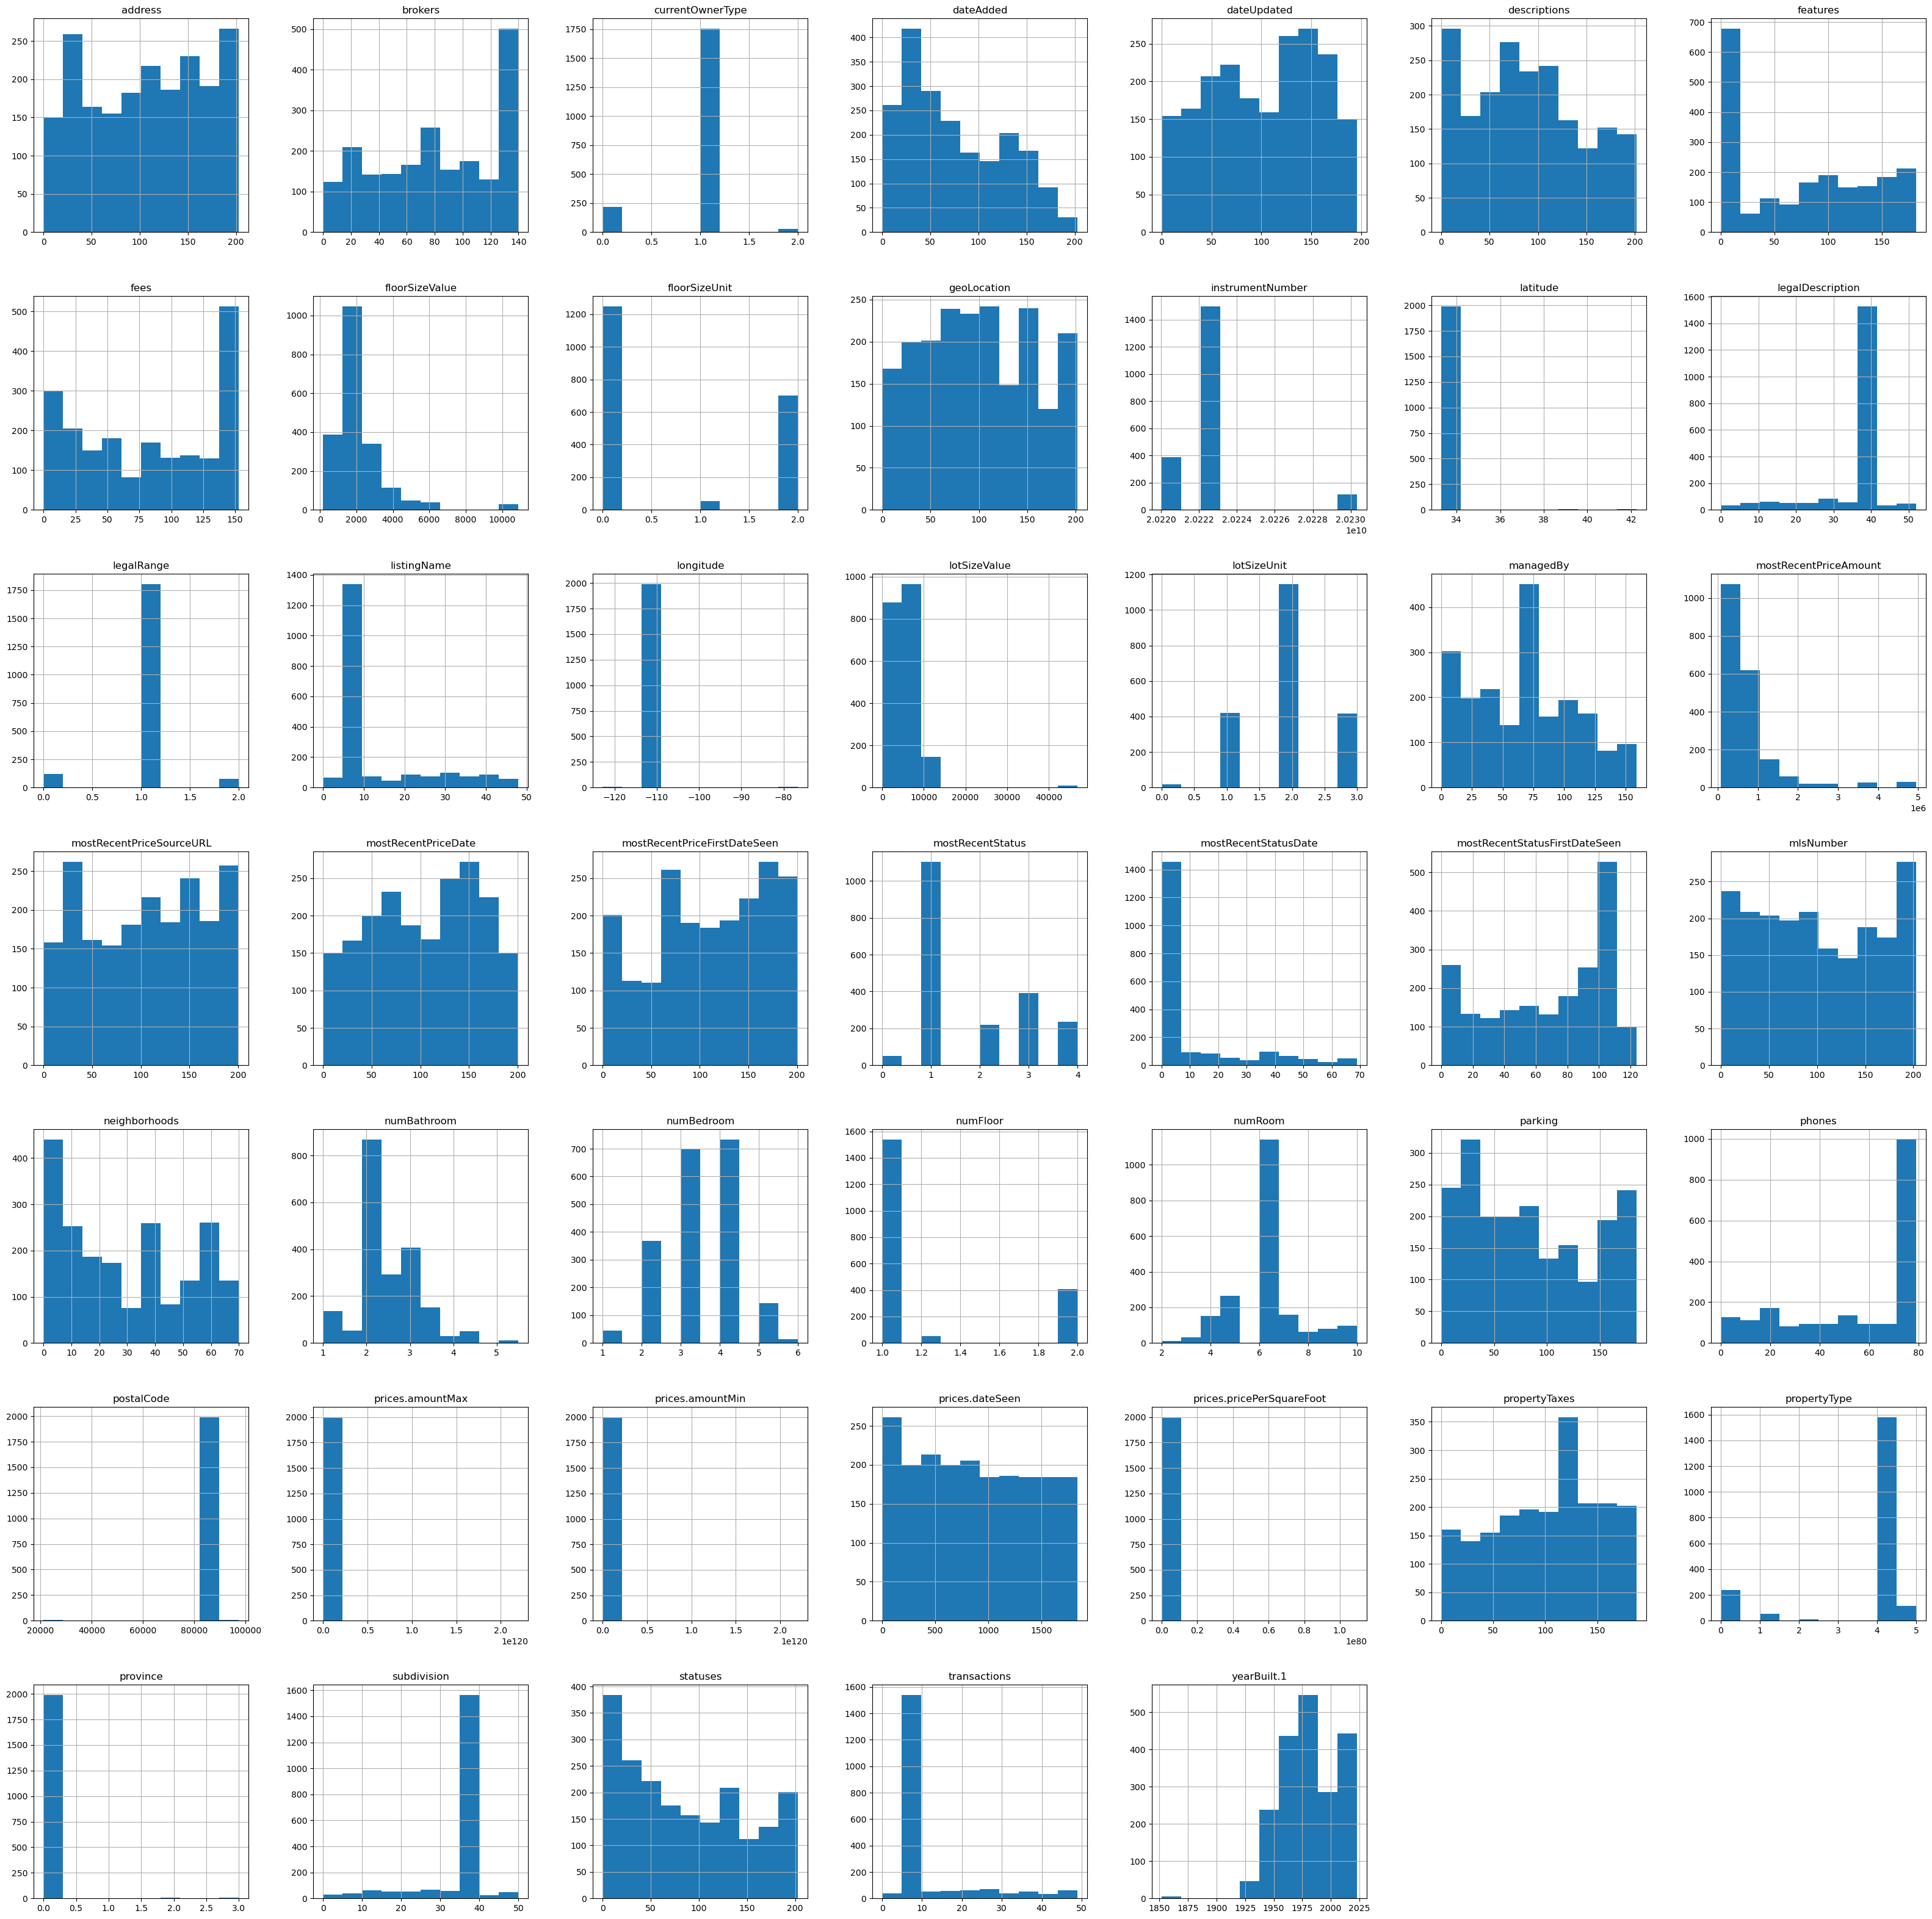

In [155]:
# Histograms for each attribute
df.hist(figsize=(40,40))
plt.show()

### Multivariate Analysis

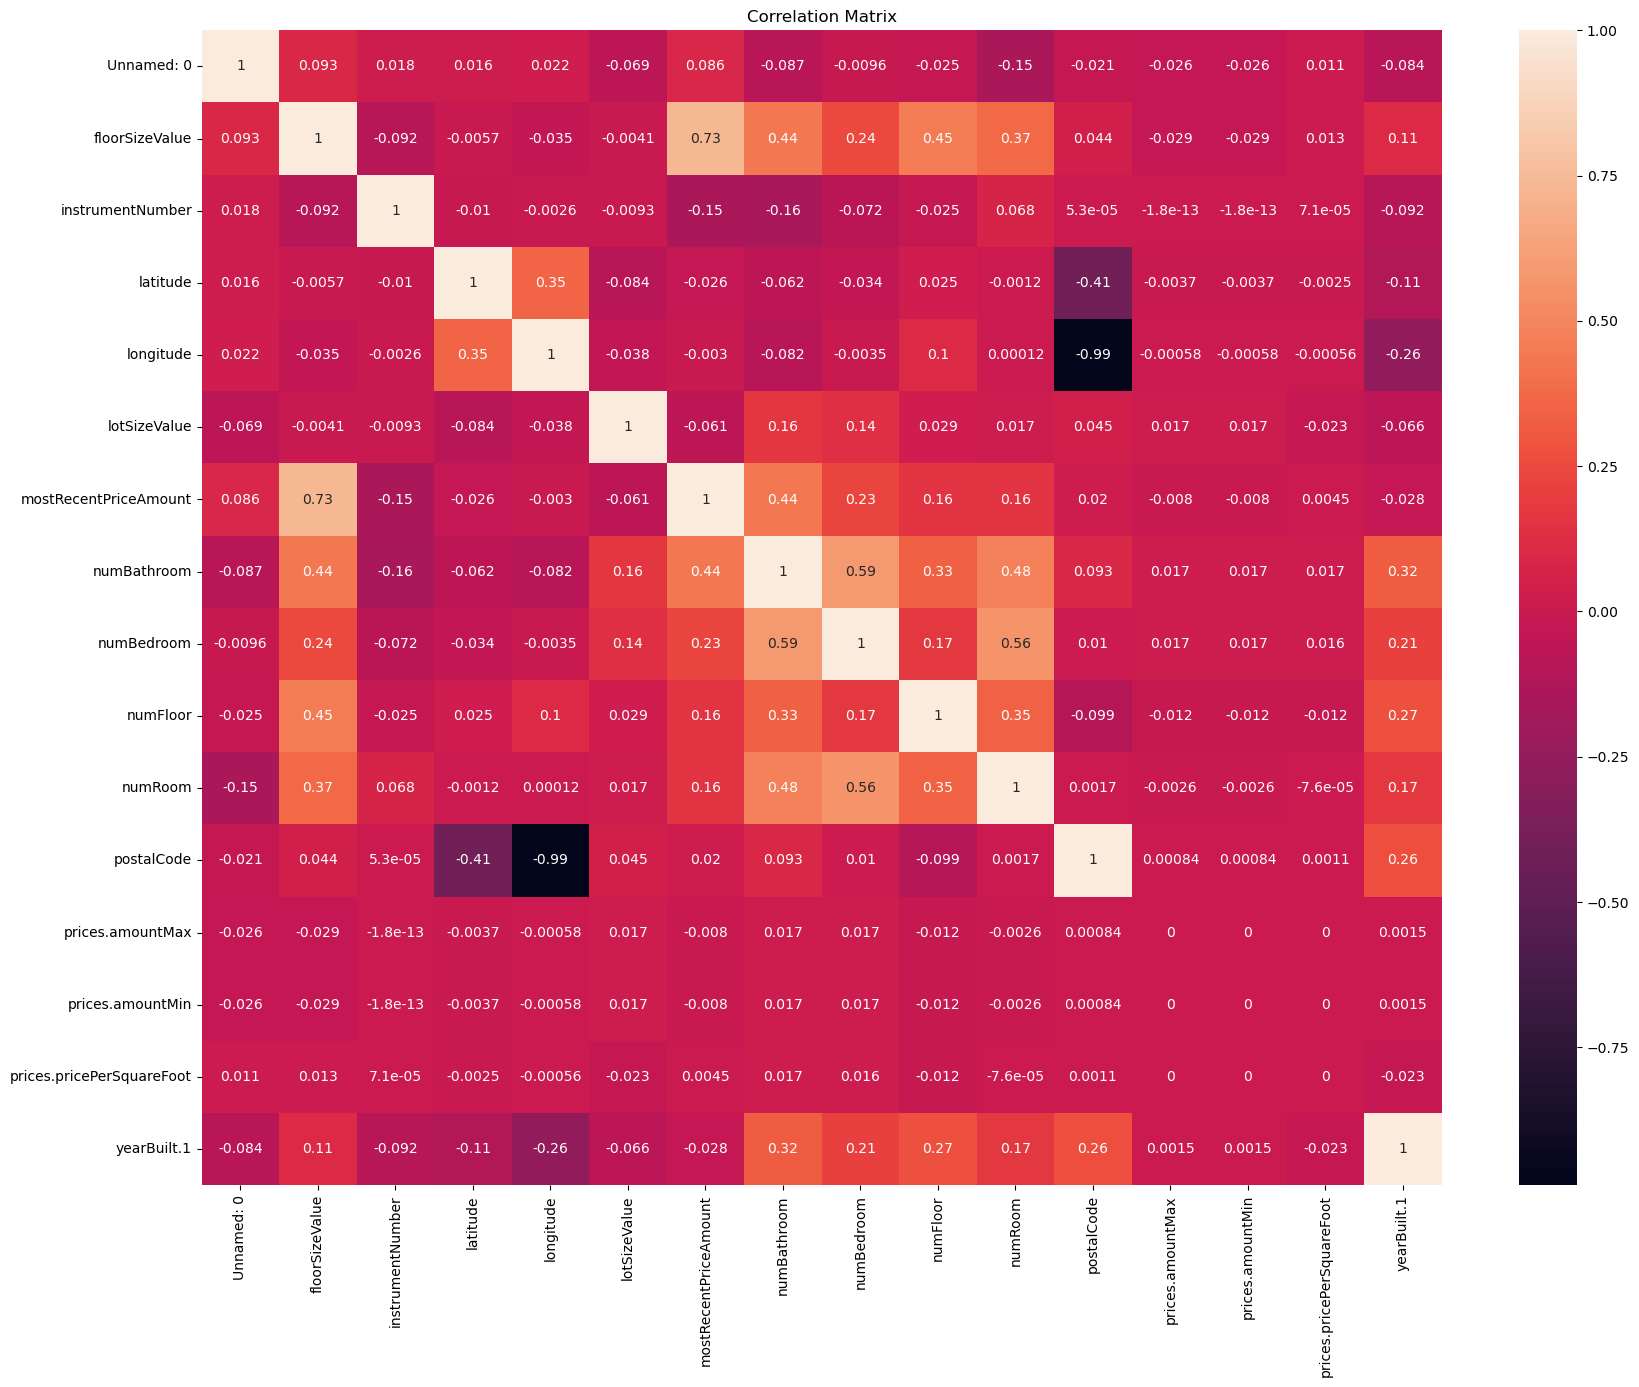

In [156]:
correlation_matrix = df1[numerical_cols].corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

### EDA for Categorical Columns

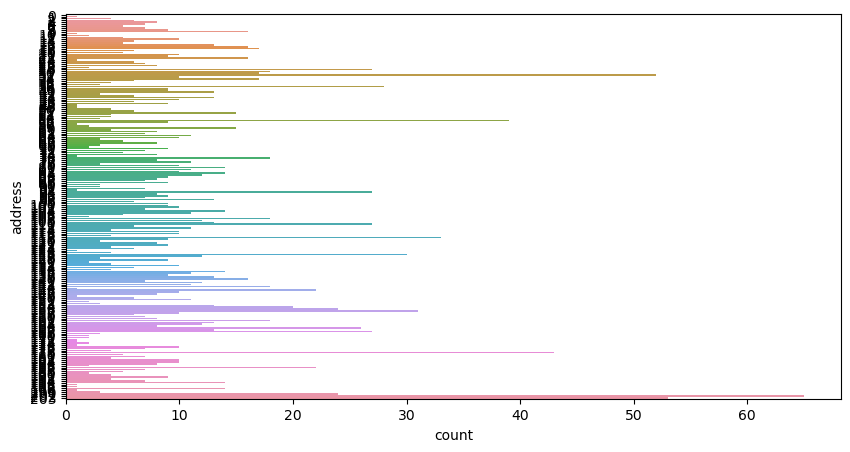

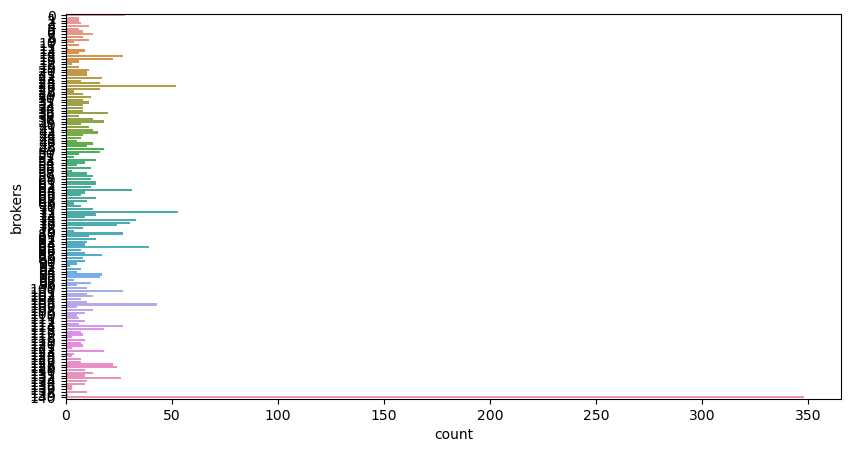

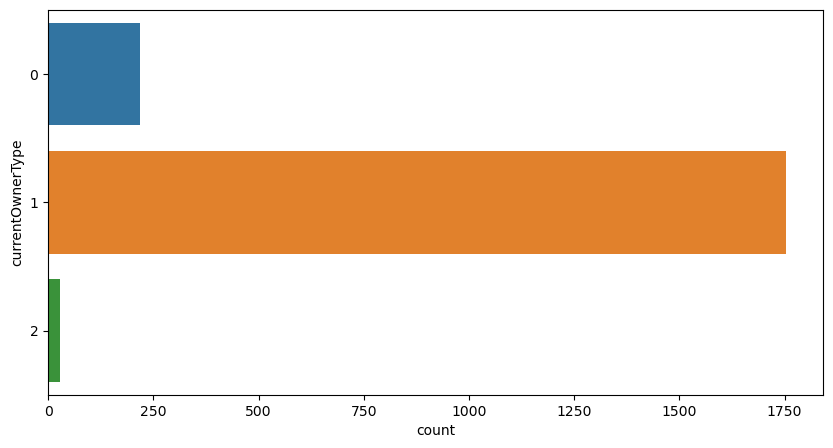

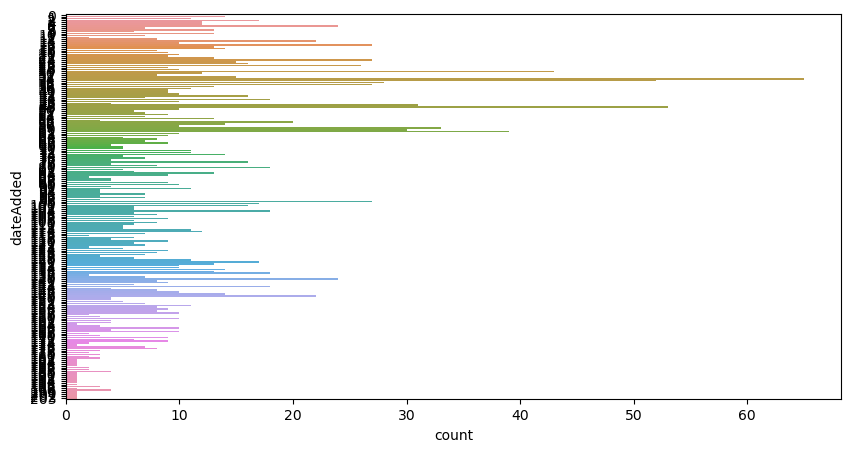

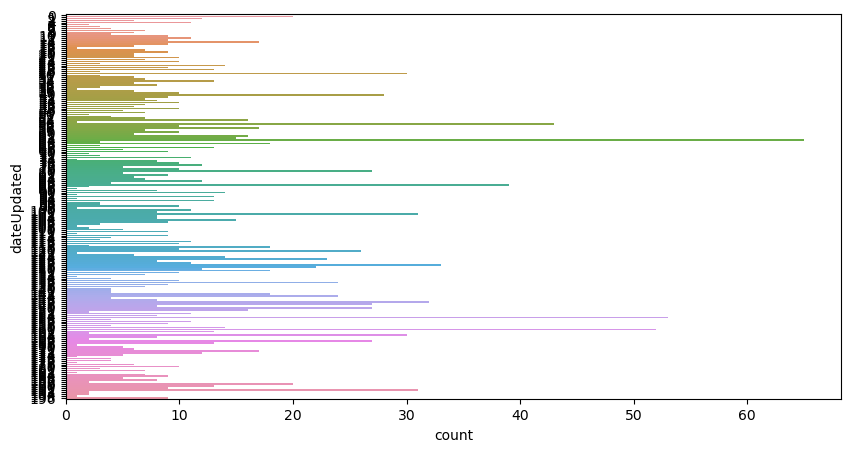

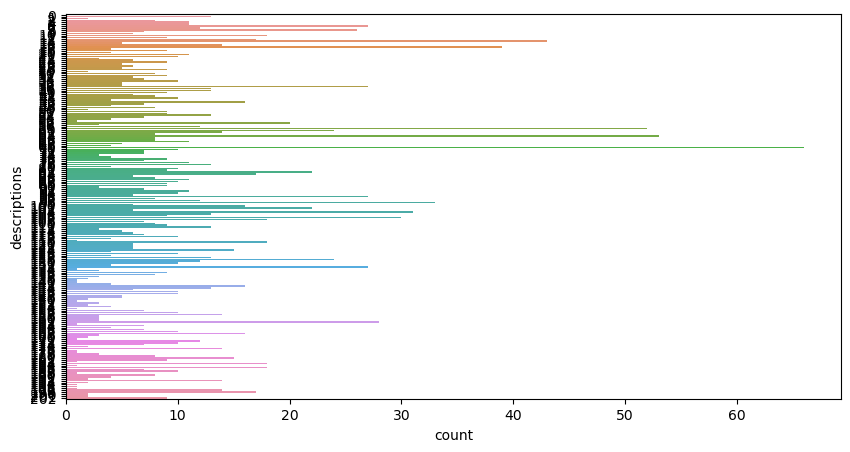

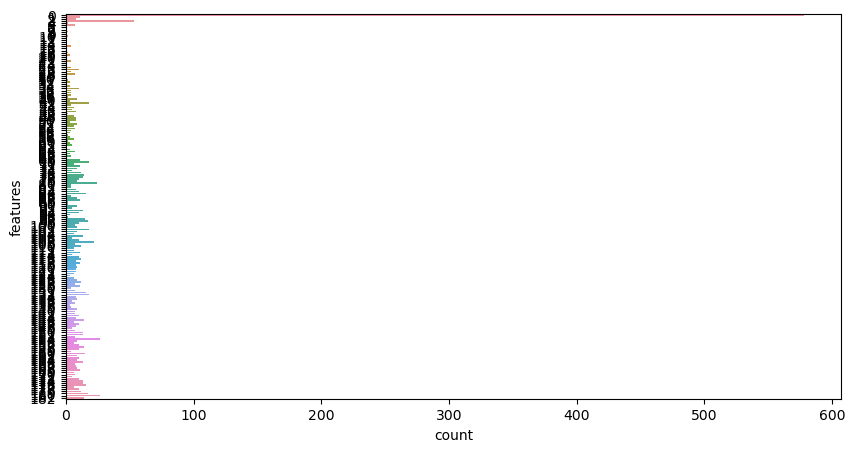

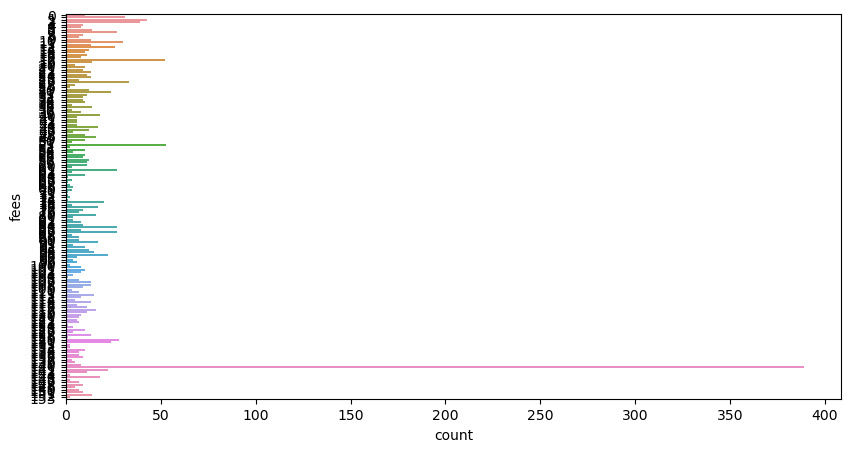

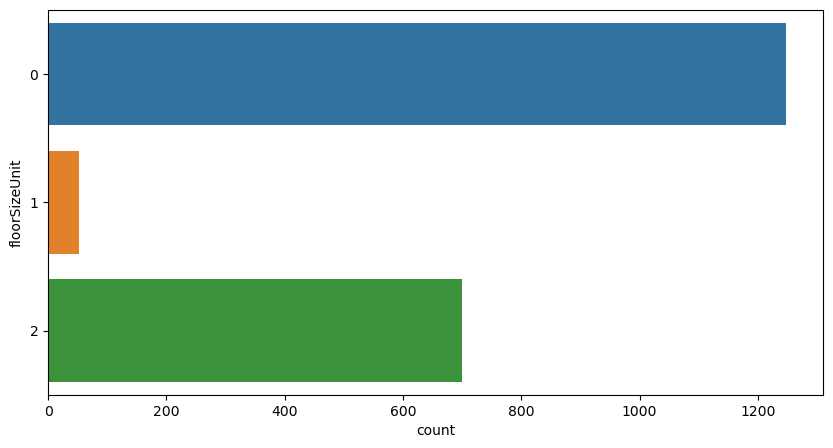

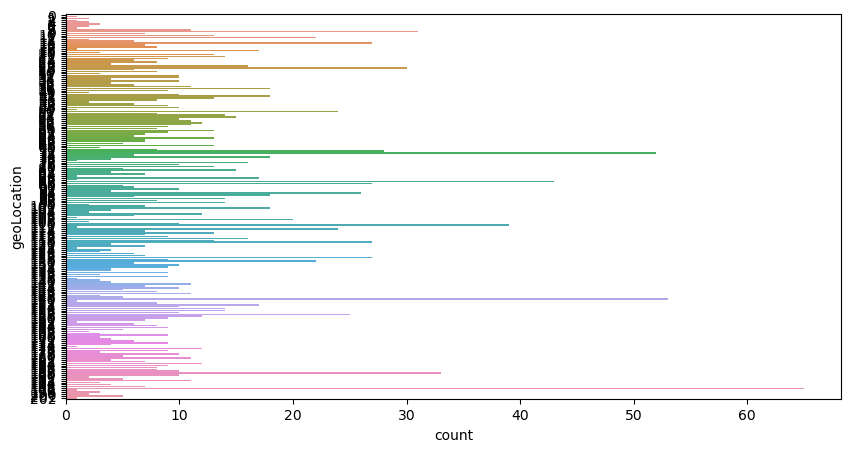

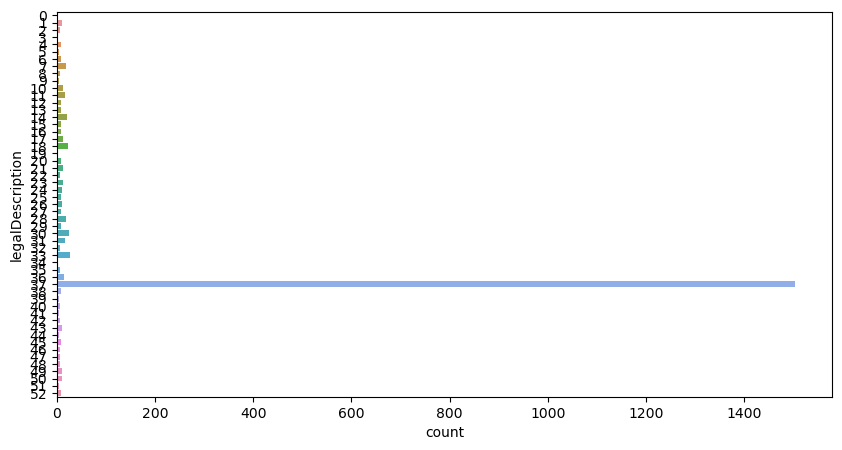

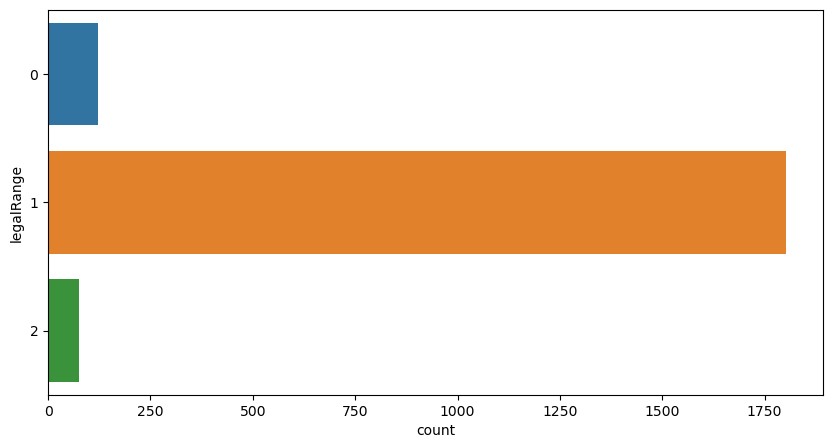

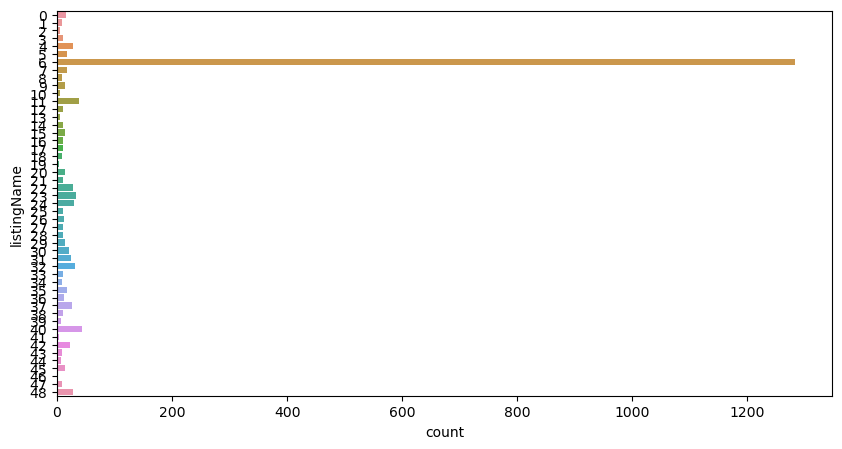

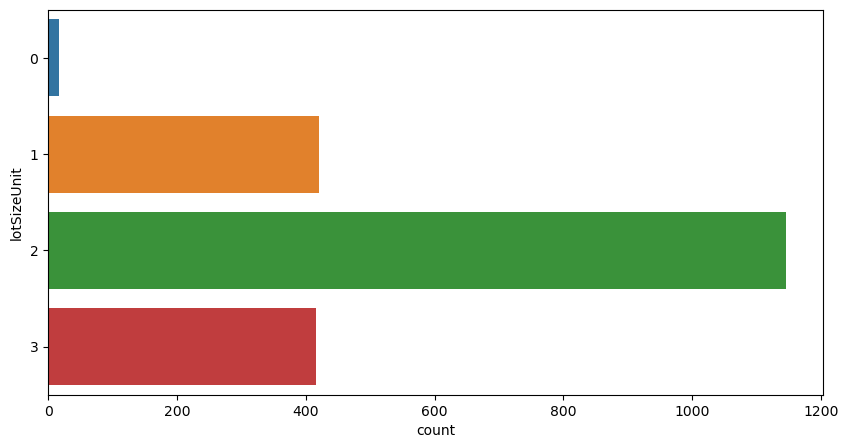

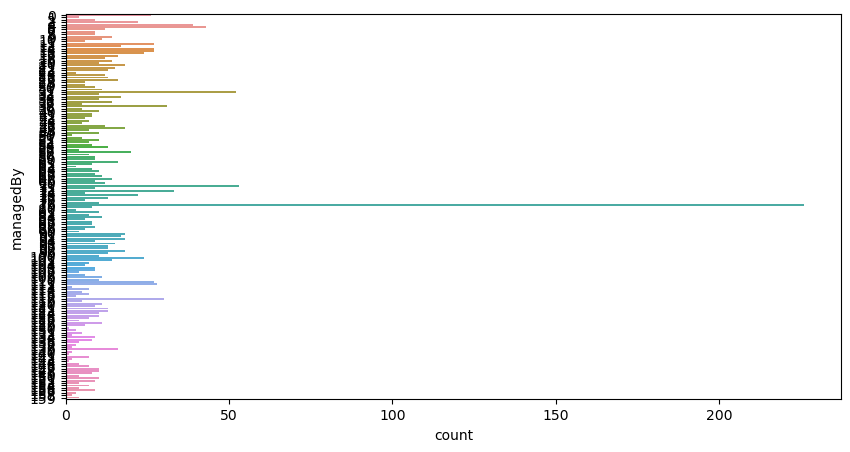

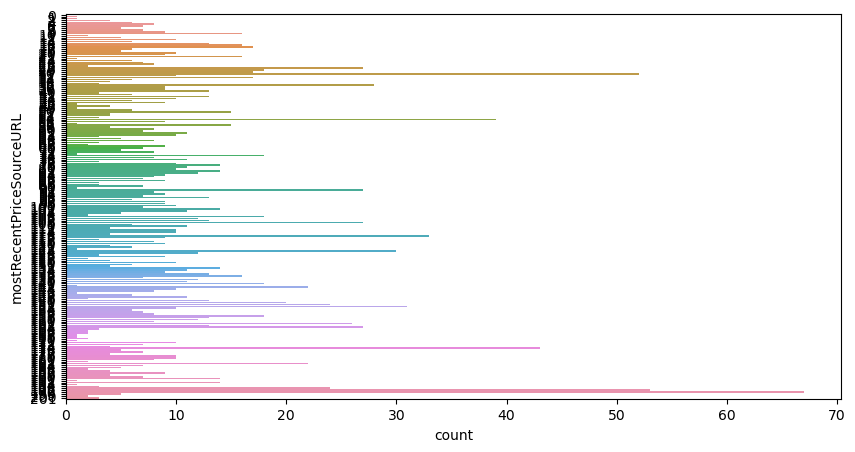

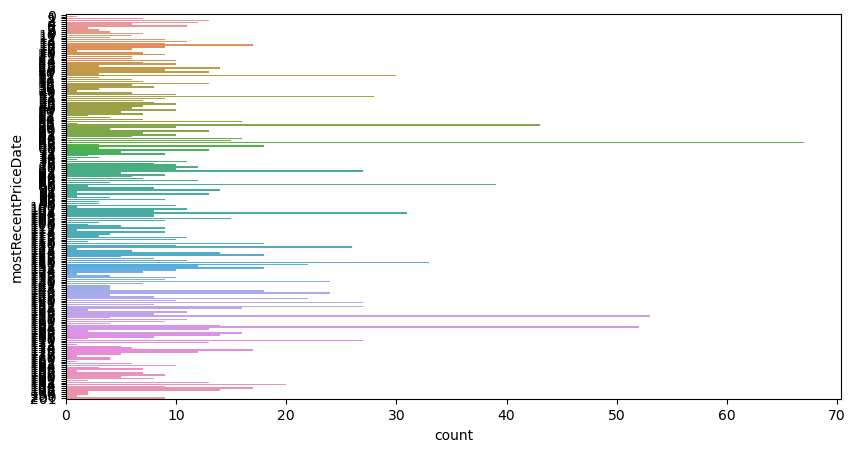

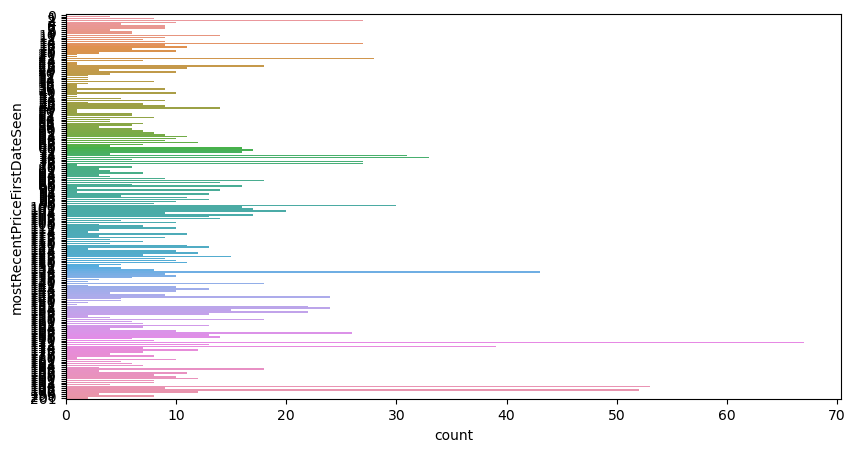

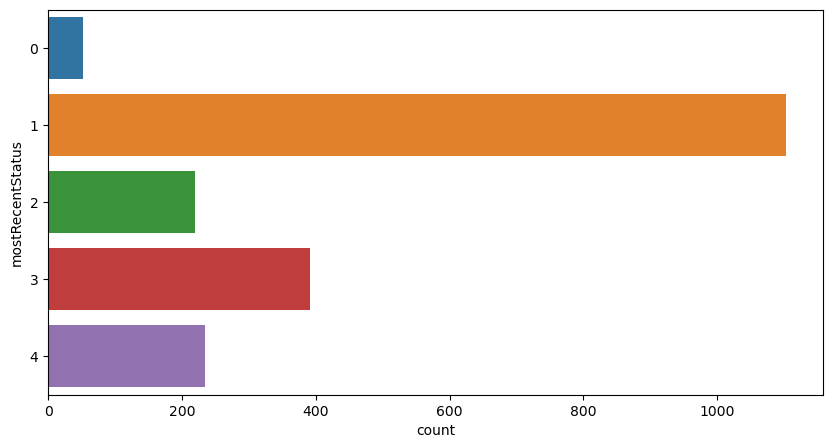

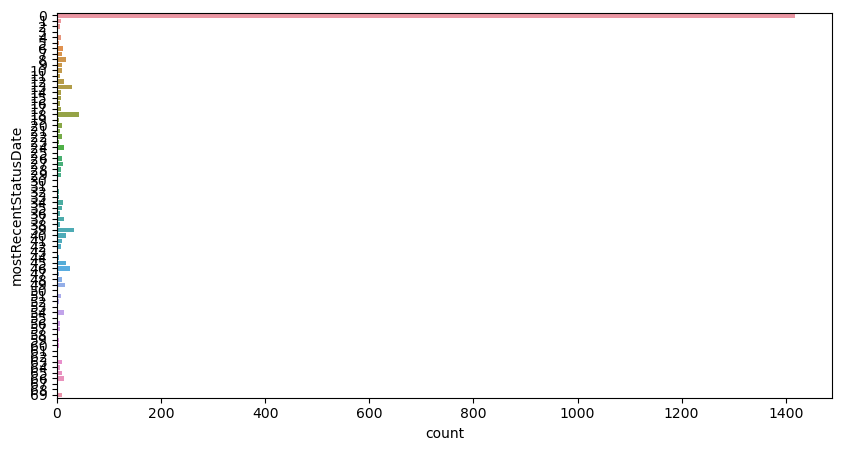

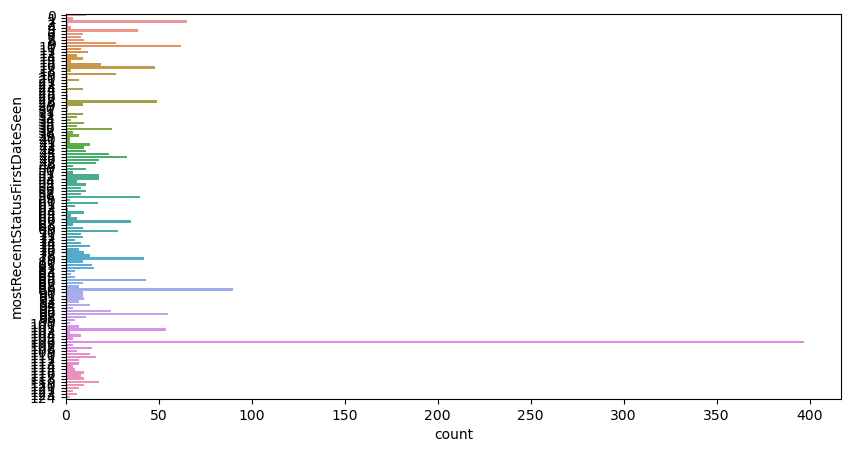

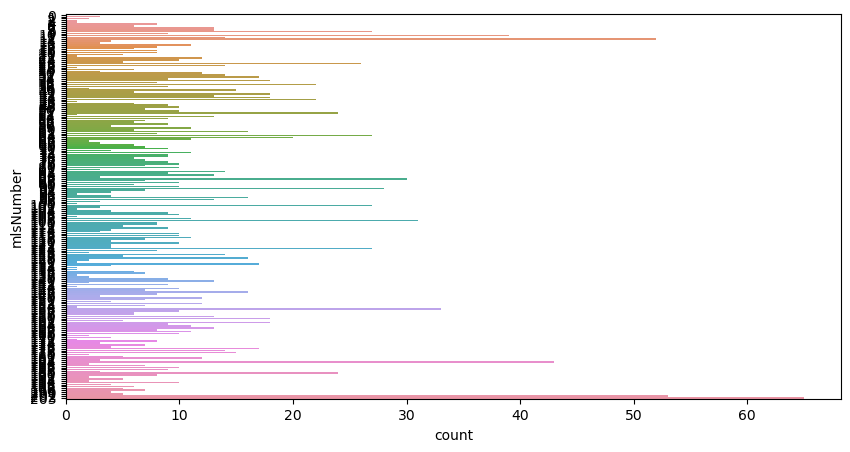

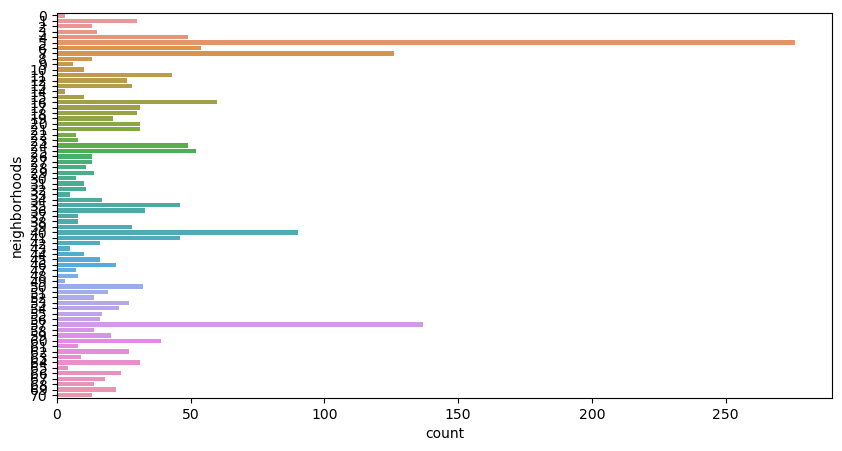

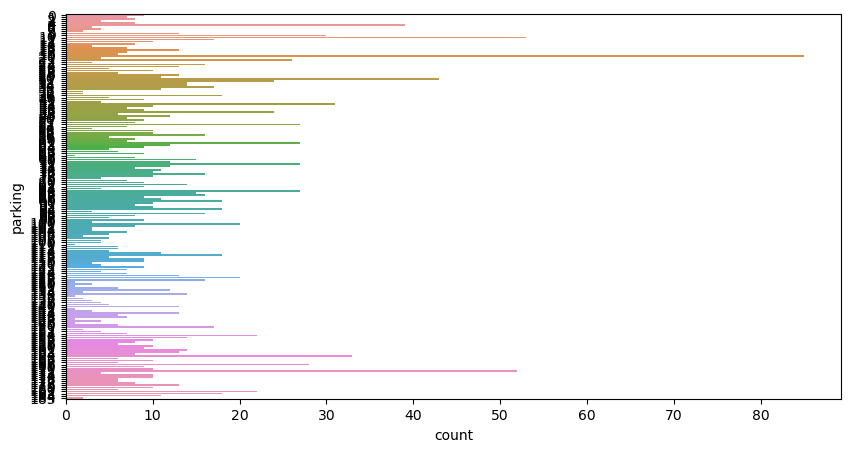

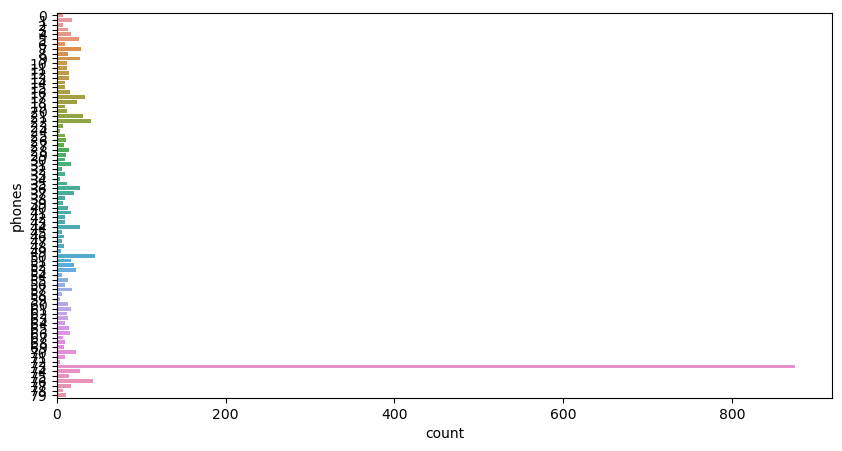

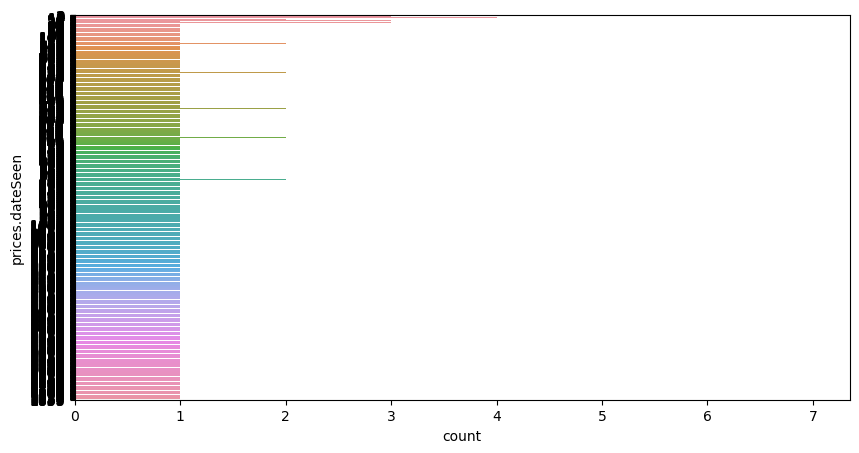

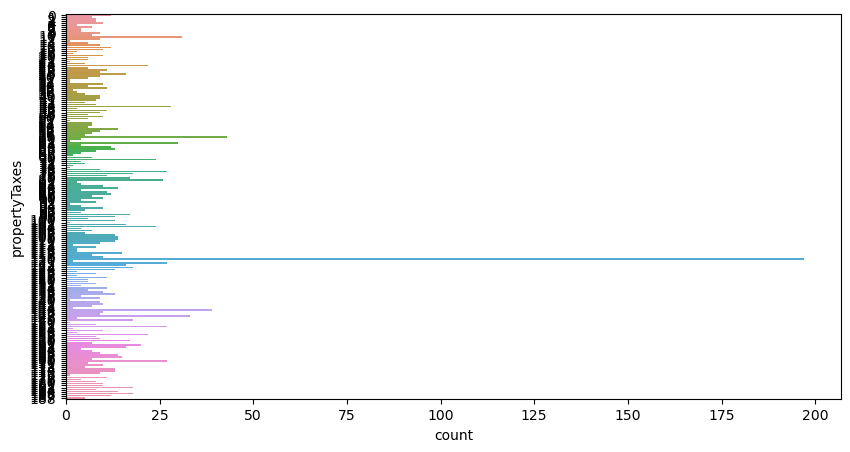

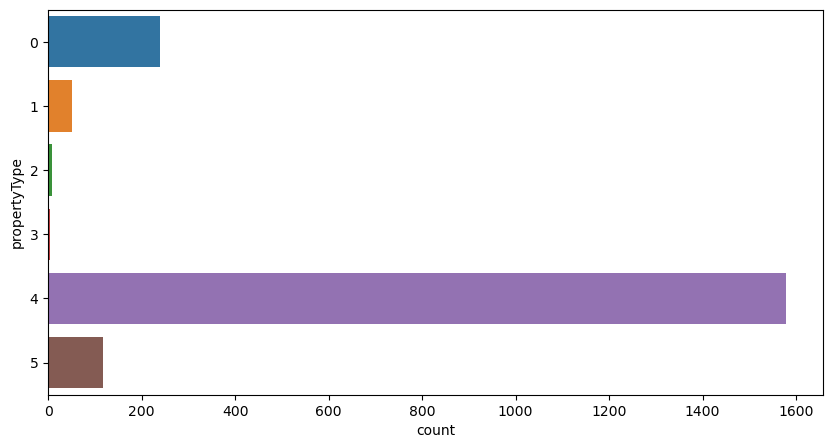

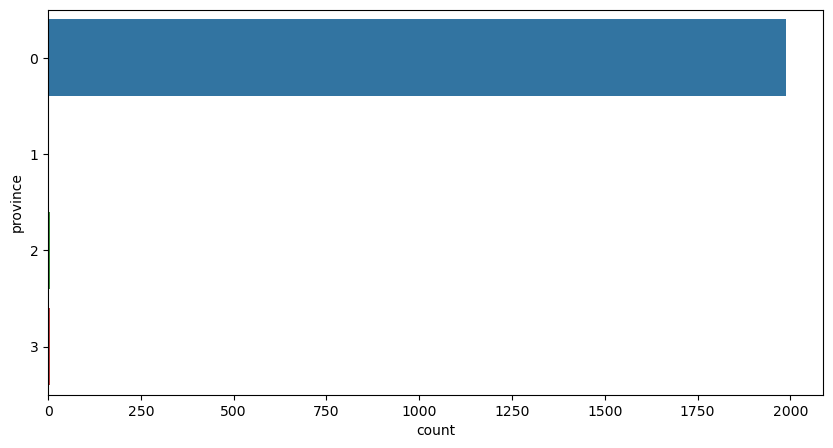

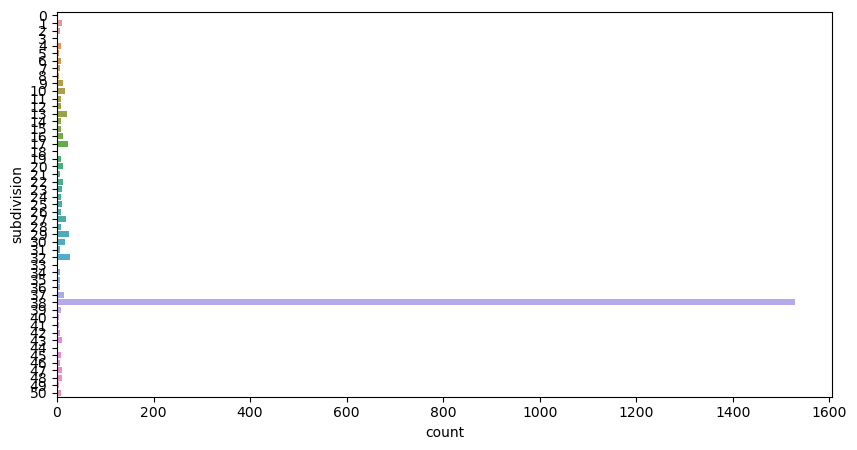

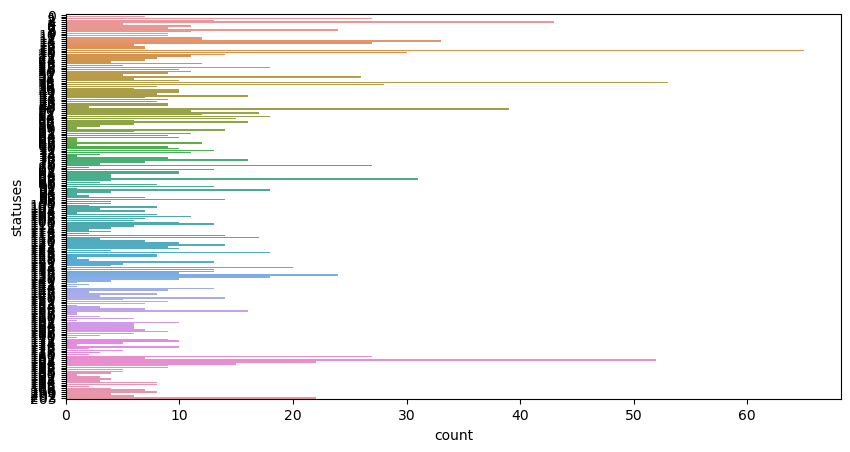

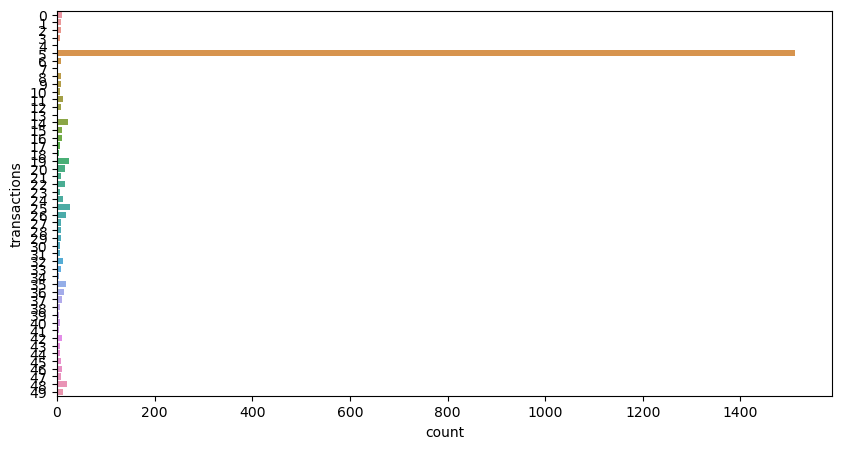

In [157]:
categorical_columns = df1.select_dtypes(include=['object']).columns
for column in categorical_columns:
    plt.figure(figsize=(10, 5))  # Width is 10 inches, Height is 5 inches
    sns.countplot(y=column, data=df)
    plt.show()

In [158]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [159]:
df_scaled

array([[-1.14174968, -0.16947555,  0.28459721, ..., -0.89955809,
        -0.81311197, -1.339927  ],
       [-1.14174968, -0.16947555,  0.28459721, ..., -0.89955809,
        -0.81311197, -1.339927  ],
       [-1.14174968, -0.16947555,  0.28459721, ..., -0.89955809,
        -0.81311197, -1.339927  ],
       ...,
       [ 0.52215973,  1.12666112,  0.28459721, ...,  0.79179912,
        -0.45296936, -1.13927643],
       [ 0.52215973,  1.12666112,  0.28459721, ...,  0.79179912,
        -0.45296936, -1.13927643],
       [-0.2432386 ,  1.33131428,  0.28459721, ...,  0.93816657,
        -0.45296936,  0.70670878]])

### Dimensionality Reduction 
#### Using PCA for dimensionality reduction, which can be particularly useful when dealing with a large number of features.

In [188]:
pca = PCA(n_components=0.95)  # Keep 95% of variance
df_pca = pca.fit_transform(df_scaled)
df_pca.shape


(2000, 33)

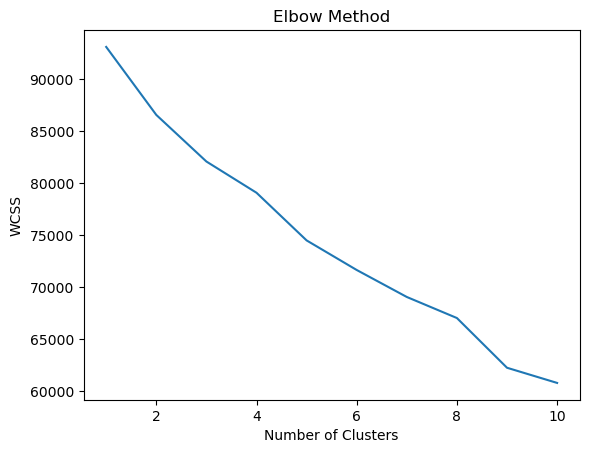

In [176]:
# Find optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# From the plot, choose the 'elbow' point (let's say k=3)
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(df_scaled)


In [169]:
#df['Cluster'] = clusters

In [170]:
df.head()

,address,brokers,currentOwnerType,dateAdded,dateUpdated,descriptions,features,fees,floorSizeValue,floorSizeUnit,...,prices.dateSeen,prices.isSold,prices.pricePerSquareFoot,propertyTaxes,propertyType,province,subdivision,statuses,transactions,yearBuilt.1
0,39,74,1,89,196,202,101,34,1291.0,2,...,241,True,145.00,159,4,0,26,31,1,1948.0
1,39,74,1,89,196,202,101,34,1291.0,2,...,465,True,156.00,159,4,0,26,31,1,1948.0
2,39,74,1,89,196,202,101,34,1291.0,2,...,1089,False,287.37,159,4,0,26,31,1,1948.0
3,39,74,1,89,196,202,101,34,1291.0,2,...,1052,False,286.60,159,4,0,26,31,1,1948.0
4,39,74,1,89,196,202,101,34,1291.0,2,...,1424,False,300.15,159,4,0,26,31,1,1948.0


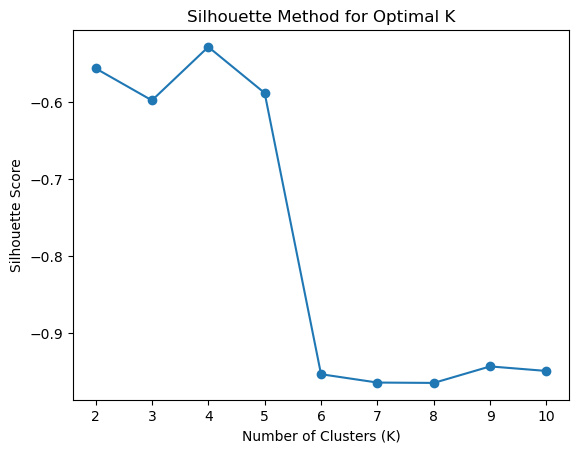

In [174]:
# Silhouette Method
silhouette_list = []
K_range_silhouette = range(2, 11)  # Silhouette score is not defined for K=1
for k in K_range_silhouette:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_pca)
    silhouette_avg = silhouette_score(df, kmeans.labels_)
    silhouette_list.append(silhouette_avg)

plt.plot(K_range_silhouette, silhouette_list, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal K')
plt.show()


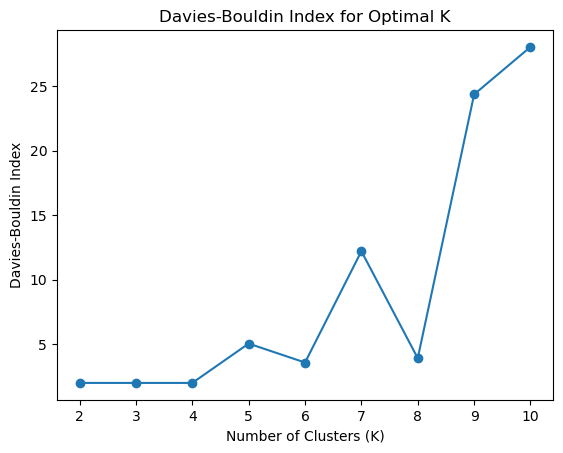

In [175]:
# Davies-Bouldin Index Method
db_list = []
K_range_db = range(2, 11)  # Davies-Bouldin Index is not defined for K=1
for k in K_range_db:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_pca)
    db_index = davies_bouldin_score(df, kmeans.labels_)
    db_list.append(db_index)

plt.plot(K_range_db, db_list, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index for Optimal K')
plt.show()


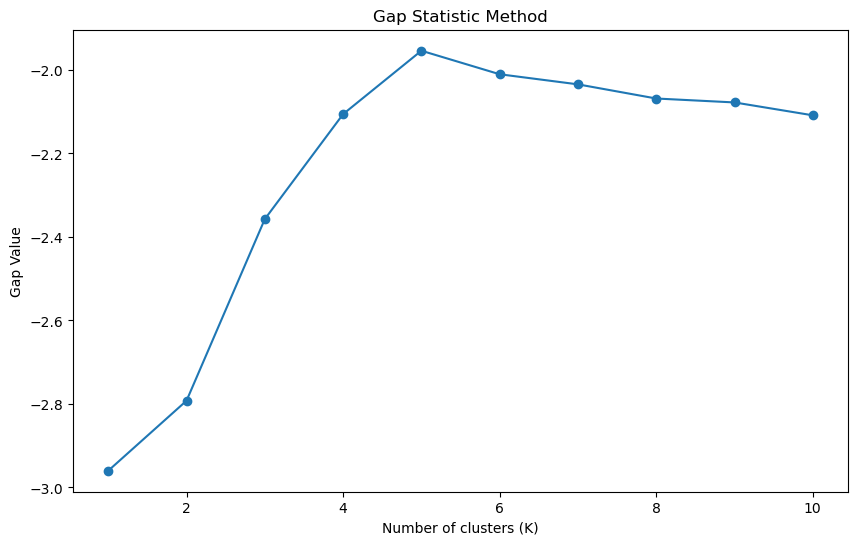

In [184]:
# Function to calculate WCSS for K-means
def wcss(X, kmeans_model):
    return np.sum(np.min(cdist(X, kmeans_model.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0]

# Function to calculate Gap Statistic
def gap_statistic(X, max_K=10, B=10):
    from scipy.spatial.distance import cdist
    import numpy as np
    
    gaps = []
    results_wcss = []
    
    # Range of K values to test
    K_range = range(1, max_K+1)
    
    # Loop over various values of K
    for k in K_range:
        # Fit the K-means model and calculate WCSS for real data
        kmeans = KMeans(n_clusters=k, n_init=10)
        kmeans.fit(X)
        wcss_k = wcss(X, kmeans)
        
        # Initialize variables for bootstrap procedure
        random_wcss = np.zeros(B)
        
        # Bootstrap B times to create random datasets
        for i in range(B):
            random_data = np.random.rand(*X.shape)
            random_kmeans = KMeans(n_clusters=k, n_init=10)
            random_kmeans.fit(random_data)
            random_wcss[i] = wcss(random_data, random_kmeans)
        
        # Calculate the Gap statistic for k
        gap_k = np.mean(np.log(random_wcss) - np.log(wcss_k))
        gaps.append(gap_k)
        
    return gaps

# Generate some example data
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=500, centers=5, random_state=42)

# Get Gap statistics
gaps = gap_statistic(X)

# Plot Gap values
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(gaps) + 1), gaps, marker='o')
plt.title("Gap Statistic Method")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Gap Value")
plt.show()

/Users/riyasm/miniconda3/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


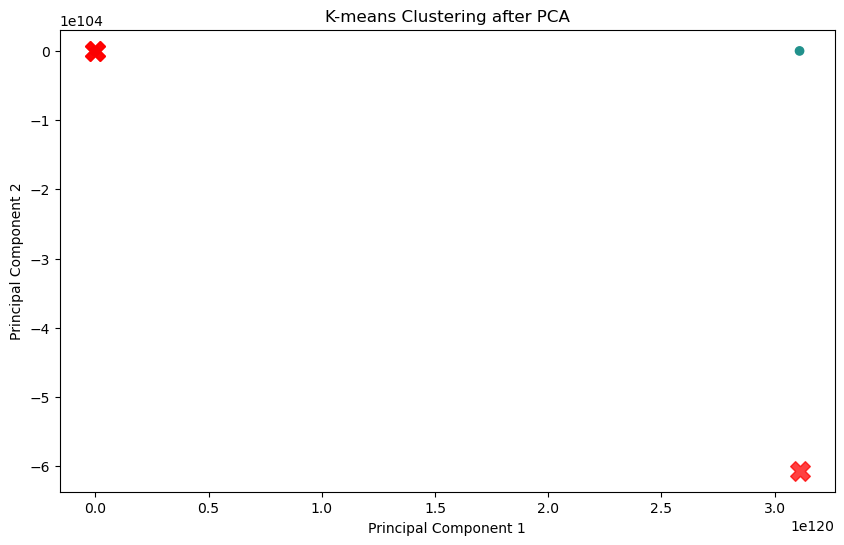

In [194]:

# Further reduce dimensions to 2 using PCA (if you haven't already reduced to 2 dimensions)
pca = PCA(n_components=2)
df_pca_2d = pca.fit_transform(df)

# Perform K-means clustering, for example, with 3 clusters
kmeans = KMeans(n_clusters=4)
clusters = kmeans.fit_predict(df)

# Add cluster number to the DataFrame
df['cluster'] = clusters

# Plot the clusters in 2D
plt.figure(figsize=(10, 6))
plt.scatter(df_pca_2d[:, 0], df_pca_2d[:, 1], c=df['cluster'], cmap='viridis')
plt.title('K-means Clustering after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Mark cluster centers
centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')

plt.show()
